In [3]:
from sys import argv
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.metrics import RocCurveDisplay, accuracy_score, confusion_matrix, PrecisionRecallDisplay, ConfusionMatrixDisplay, make_scorer, precision_score,recall_score
from sklearn.model_selection import train_test_split, LeavePGroupsOut, GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.inspection import permutation_importance
from collections import Counter
complete_features=[
        "AF1",
        "AF2",
        "AF3",
        "AF4",
        "AF5",
        "BLOSUM1",
        "BLOSUM2",
        "BLOSUM3",
        "BLOSUM4",
        "BLOSUM5",
        "BLOSUM6",
        "BLOSUM7",
        "BLOSUM8",
        "BLOSUM9",
        "BLOSUM10",
        "PP1",
        "PP2",
        "PP3",
        "F1",
        "F2",
        "F3",
        "F4",
        "F5",
        "F6",
        "KF1",
        "KF2",
        "KF3",
        "KF4",
        "KF5",
        "KF6",
        "KF7",
        "KF8",
        "KF9",
        "KF10",
        "MSWHIM1",
        "MSWHIM2",
        "MSWHIM3",
        "E1",
        "E2",
        "E3",
        "E4",
        "E5",
        "PD1",
        "PD2",
        "PRIN1",
        "PRIN2",
        "PRIN3",
        "ProtFP1",
        "ProtFP2",
        "ProtFP3",
        "ProtFP4",
        "ProtFP5",
        "ProtFP6",
        "ProtFP7",
        "ProtFP8",
        "SV1",
        "SV2",
        "SV3",
        "SV4",
        "ST1",
        "ST2",
        "ST3",
        "ST4",
        "ST5",
        "ST6",
        "ST7",
        "ST8",
        "SVGER1",
        "SVGER2",
        "SVGER3",
        "SVGER4",
        "SVGER5",
        "SVGER6",
        "SVGER7",
        "SVGER8",
        "SVGER9",
        "SVGER10",
        "SVGER11",
        "T1",
        "T2",
        "T3",
        "T4",
        "T5",
        "VHSE1",
        "VHSE2",
        "VHSE3",
        "VHSE4",
        "VHSE5",
        "VHSE6",
        "VHSE7",
        "VHSE8",
        "VSTPV1",
        "VSTPV2",
        "VSTPV3",
        "VSTPV4",
        "VSTPV5",
        "VSTPV6",
        "Z1",
        "Z2",
        "Z3",
        "Z4",
        "Z5",
        "cys30",
        "cys20",
        "cys_ser30",
        "cys_ser20",
        "charge",
        "avgcharge",
        "avghydrop",
        "length",
        "entropy",
        "entropyratio",
        "boman",
        "instability",
        "aliphatic",
        "A",
        "R",
        "N",
        "D",
        "C",
        "E",
        "Q",
        "G",
        "H",
        "I",
        "L",
        "K",
        "M",
        "F",
        "P",
        "S",
        "T",
        "W",
        "Y",
        "V",
        "RHK",
        "DE",
        "STNQ",
        "CGP",
        "AVIL",
        "MFYW",
    ]

original_features=[
        "cys30",
        "cys20",
        "cys_ser30",
        "cys_ser20",
        "charge",
        "avgcharge",
        "avghydrop",
        "length",
        "entropy",
        "entropyratio",
        "boman",
        "instability",
        "aliphatic",
        "A",
        "R",
        "N",
        "D",
        "C",
        "E",
        "Q",
        "G",
        "H",
        "I",
        "L",
        "K",
        "M",
        "F",
        "P",
        "S",
        "T",
        "W",
        "Y",
        "V",
        "RHK",
        "DE",
        "STNQ",
        "CGP",
        "AVIL",
        "MFYW"
    ]
feature_selection=['RHK','R','H','K','avghydrop','length','BLOSUM7','PP2','F3','F6','MSWHIM3','E4','PD1','PRIN3','ProtFP5','SV3','SV4','ST7','T3','VHSE5',"cys30",
        "cys20",
        "cys_ser30",
        "cys_ser20",
        "charge",
        "avgcharge"]
ripp_classes=['Guanidinotide',
              'Cyanobactin',
              'Thiopeptide',
              'TBA', 
              'Pearlin',
              'Ryptide',
              'Glycocin', 
              'Borosin',
              'Microcin', 
              'Head-to-tail cyclized peptide',
              'Pantocin', 
              'other',
              'Bottromycin',
              'Mycofactocin',
              'Cyptide', 
              'Streptide', 
              'Epipeptide', 
              'Dikaritin',
              'Proteusin', 
              'Rotapeptide',
              'Microviridin', 
              'Methanobactin', 
              'Ranthipeptide', 
              'Thioamitide',
              'Amatoxin',
              'Cyclotide',
              'Sulfatyrotide',
              'AIP',
              'Selidamide',
              'Graspetide', 
              'Crocagin', 
              'N-Formylated TBA', 
              'Linear azole-containing peptide', 
              'Lanthipeptide',
              'Lasso', 
              'Sactipeptide',
              'Bacteriocin', 
              'Lyciumin',
              'Linaridin']

In [4]:
def svm_training_split(dataset_file,feature_list):
    dataset = pd.read_csv(dataset_file)
    dataset = dataset.drop(labels="sequence", axis=1)
    x = dataset[feature_list]
    y = dataset[["RiPP"]].to_numpy().ravel()
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2,random_state=42)
    return x_train, x_test, y_train, y_test

def class_split_iterable(dataset,class_list):
    custom_cv=[]
    for category in class_list:
        positive_indices=dataset[dataset['Class'].str.contains(category, na=False)].index.tolist()
        negative_indices = dataset[dataset['Class'].str.contains('No_RiPP', na=False)].index.tolist()
        sample_size = min(len(positive_indices)*40, len(negative_indices))  # Handle cases with fewer matches
        random_indices = random.sample(negative_indices, sample_size)
        validation_indices=positive_indices+random_indices
        all_indices = dataset.index.tolist()
        training_indices = list(set(all_indices) - set(validation_indices))
        training_indices.sort()
        validation_indices.sort()
        custom_cv.append((tuple(training_indices),tuple(validation_indices)))
    return custom_cv


def x_and_y(dataset,feature_list):
    dataset = dataset.drop(labels=["sequence","Class"], axis=1)
    x = dataset[feature_list]
    y = dataset[["RiPP"]].to_numpy().ravel()
    return x,y

def f_importances(coef, names):
    imp = coef
    imp, names = zip(*sorted(zip(imp, names, strict=False)), strict=False)
    fig=plt.figure(figsize=(5,5),dpi=300)
    plt.barh(range(len(names)), imp, align="center")
    plt.yticks(range(len(names)), names, fontsize=3)
    plt.title('Feature coefficients')
    plt.show()
    
def svc_classification(x_train, x_test, y_train, y_test,feature_list):
    for i in range(1,8):
            poly_svc = svm.SVC(C=10,kernel="poly",random_state=0,degree=i,class_weight={'RiPP':10, 'No_RiPP':0.5})
            poly_svc.fit(x_train, y_train)
            #f_importances(abs(poly_svc.coef_[0]),feature_list)
            y_pred = poly_svc.predict(x_test)
            print(
                pd.DataFrame(
                    confusion_matrix(y_test, y_pred),
                    index=poly_svc.classes_,
                    columns=poly_svc.classes_,
                )
            )
            fig,axes=plt.subplots(1,3,figsize=(15,5))
            RocCurveDisplay.from_estimator(
                poly_svc, x_test, y_test, name="Validation data", ax=axes[0], alpha=0.8
            )
            RocCurveDisplay.from_estimator(poly_svc,x_train,y_train,name='Training data', ax=axes[0],alpha=0.8)
            axes[0].set_title('ROC Curve')
            #plt.show()
            
            PrecisionRecallDisplay.from_estimator(poly_svc,x_test,y_test,name='Validation data',ax=axes[1], alpha=0.8)
            PrecisionRecallDisplay.from_estimator(poly_svc,x_train,y_train,name='Training data',ax=axes[1], alpha=0.8)
            axes[1].set_title('Precision-Recall Curve')
            #plt.show()
            
            ConfusionMatrixDisplay.from_estimator(poly_svc,x_test,y_test,ax=axes[2])
            axes[2].set_title('Confusion matrix')
            
            fig.suptitle(f'SVM with degree {i}')
            plt.tight_layout()
            plt.show()
            # Compute permutation importance
            perm_importance = permutation_importance(poly_svc, x_test, y_test, n_repeats=10, scoring='accuracy', random_state=42,n_jobs=20)
            # Display feature importance
            for i in perm_importance.importances_mean.argsort()[::-1]:
                print(f"Feature {feature_list[i]}: {perm_importance.importances_mean[i]:.3f} ± {perm_importance.importances_std[i]:.3f}")
                
            #print("Feature Importance:", feature_importance)

Grid search and cross validation of different parameters:

Fitting 39 folds for each of 18 candidates, totalling 702 fits


/lustre/BIF/nobackup/sanz006/miniforge3/envs/ripp/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lustre/BIF/nobackup/sanz006/miniforge3/envs/ripp/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lustre/BIF/nobackup/sanz006/miniforge3/envs/ripp/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

{'mean_fit_time': array([30.43170098, 30.65858741, 26.8689386 , 27.98712223, 29.47403126,
       31.11121819, 28.62613416, 25.43047661, 20.93108666, 22.00167765,
       23.72833134, 25.37505424, 28.37653688, 22.40317826, 18.02935087,
       19.27297023, 20.85347819, 21.80849657]), 'std_fit_time': array([3.71102041, 3.49844875, 3.03940173, 3.21518679, 3.36030241,
       3.55535208, 3.24632998, 3.07963198, 2.51062509, 2.55844726,
       2.63047591, 2.74583624, 3.09858534, 2.37998964, 1.96275209,
       2.03921252, 2.29938126, 2.60882677]), 'mean_score_time': array([0.67276641, 0.59280285, 0.49050051, 0.52064321, 0.60683086,
       0.61970733, 0.4644288 , 0.37978199, 0.31895231, 0.34141237,
       0.37488876, 0.41086854, 0.31978701, 0.26365706, 0.24046648,
       0.25858553, 0.2798196 , 0.29119702]), 'std_score_time': array([0.9288836 , 0.94995977, 0.80292112, 0.8048085 , 0.98456985,
       0.91976711, 0.80716641, 0.66731096, 0.58555738, 0.61718013,
       0.65004613, 0.69624088, 0.605335

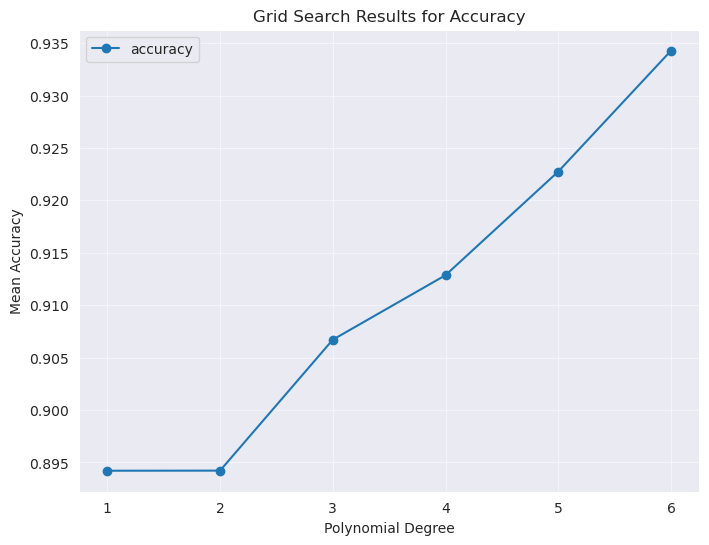

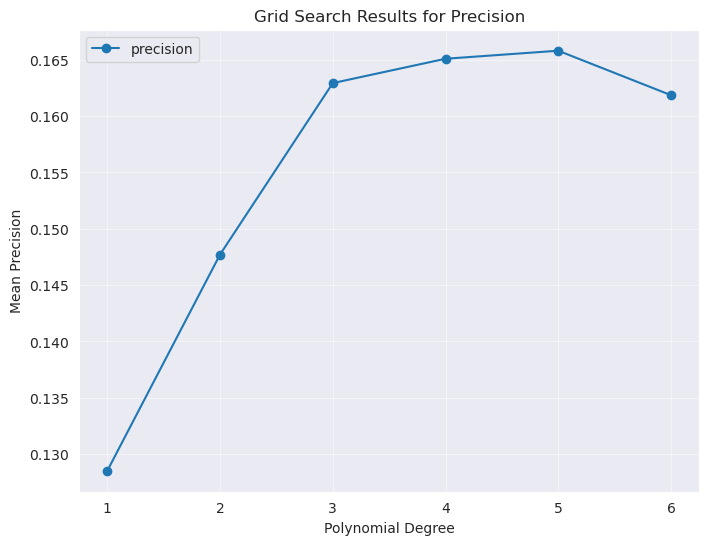

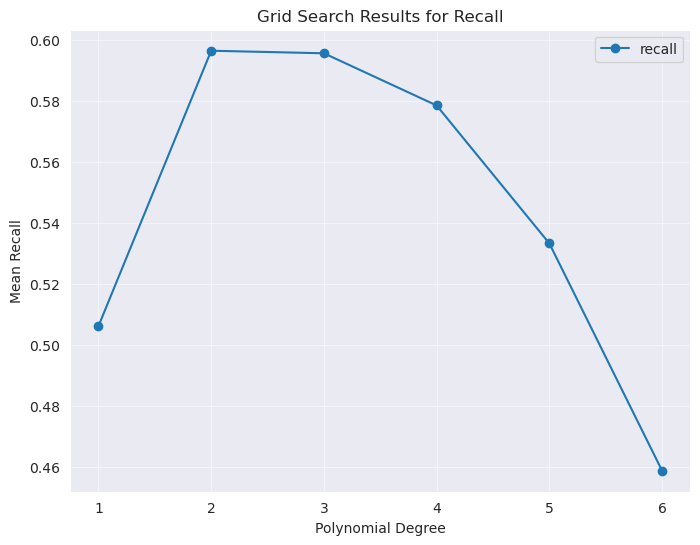

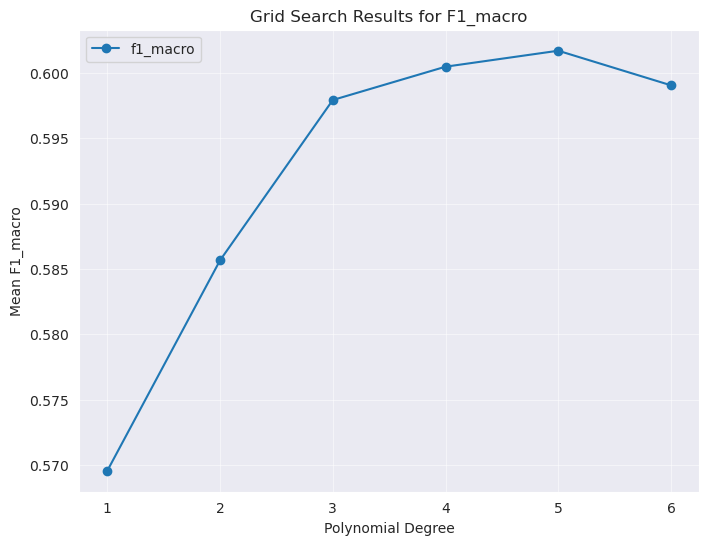

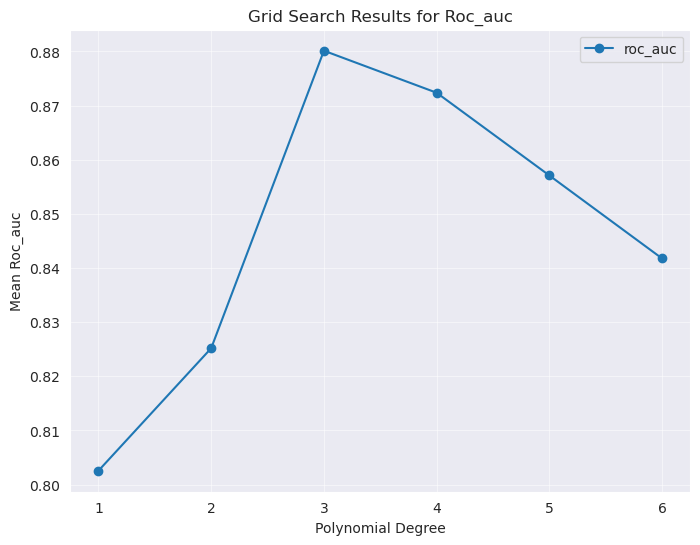

In [5]:
# Define the parameter grid
param_grid = {'degree': [1,2, 3, 4, 5,6], 'C': [1, 10,100]}  # Adjust C as needed

# Initialize SVM with polynomial kernel
scoring_metrics = {
    'accuracy': 'accuracy',  # Predefined scorer
    'precision': make_scorer(precision_score, pos_label='RiPP'),
    'recall': make_scorer(recall_score, pos_label='RiPP'),
    'f1_macro': 'f1_macro',  # Predefined scorer
    'roc_auc': 'roc_auc'  # Predefined scorer
}
poly_svm = svm.SVC(kernel='poly',class_weight={'RiPP':10, 'No_RiPP':0.5})
dataset= pd.read_csv('/lustre/BIF/nobackup/sanz006/training_dataset.csv')
x,y=x_and_y(dataset,complete_features)
my_cv=class_split_iterable(dataset,ripp_classes)
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=poly_svm, param_grid=param_grid, cv=my_cv, scoring=scoring_metrics, verbose=1, n_jobs=30,refit=False)
grid_search.fit(x, y)

# Extract results
results = grid_search.cv_results_
degrees = param_grid['degree']
c= param_grid['C']
print(results)
df_precision=pd.DataFrame(results['mean_test_precision'])
df_precision.to_csv('/lustre/BIF/nobackup/sanz006/positive_training/precision_curve_grid.csv')
df_recall=pd.DataFrame(results['mean_test_recall'])
df_recall.to_csv('/lustre/BIF/nobackup/sanz006/positive_training/recall_curve_grid.csv')
for metric in scoring_metrics.keys():
    mean_test_scores = []
    for degree in degrees:
        indices = [
            idx for idx, params in enumerate(results['params']) if params['degree'] == degree
        ]
        mean_test_scores.append(np.mean([results[f'mean_test_{metric}'][idx] for idx in indices]))
    
    # Plot for the current metric
    plt.figure(figsize=(8, 6))
    plt.plot(degrees, mean_test_scores, marker='o', linestyle='-', label=metric)
    plt.xlabel('Polynomial Degree')
    plt.ylabel(f'Mean {metric.capitalize()}')
    plt.title(f'Grid Search Results for {metric.capitalize()}')
    plt.xticks(degrees)
    plt.grid(alpha=0.5)
    plt.legend()
    plt.show()


Old algorithm (done with 80/20 split):

         No_RiPP  RiPP
No_RiPP     1384   447
RiPP           7   898


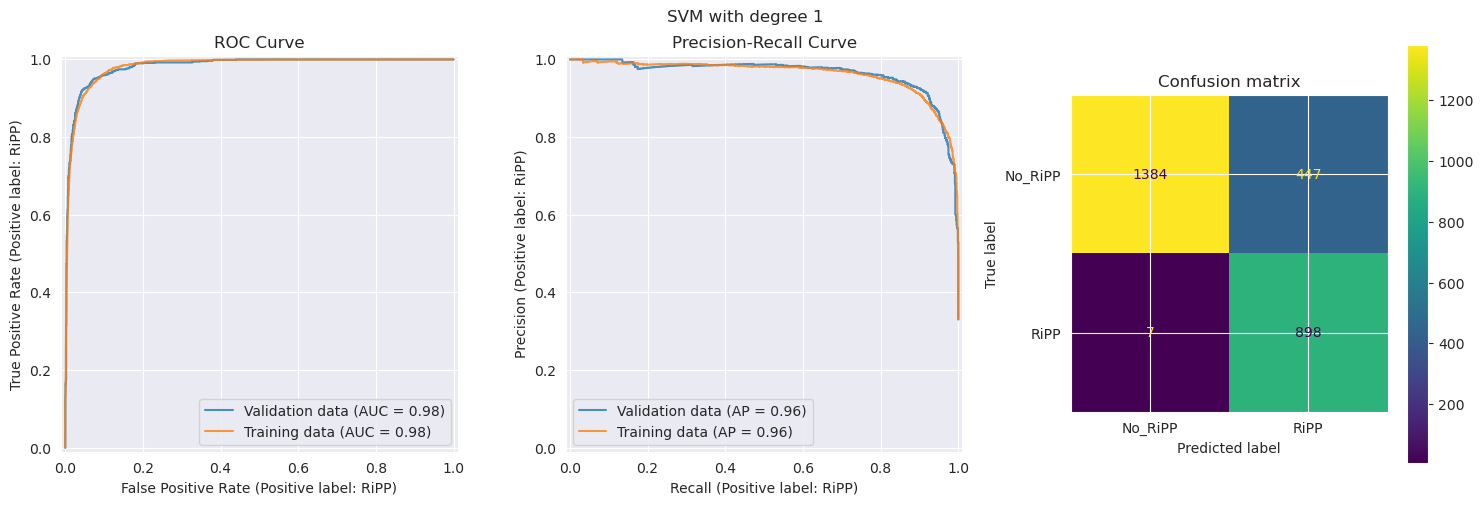

Feature length: 0.107 ± 0.005
Feature charge: 0.050 ± 0.008
Feature boman: 0.029 ± 0.006
Feature PRIN1: 0.020 ± 0.003
Feature SVGER11: 0.011 ± 0.002
Feature PRIN2: 0.010 ± 0.002
Feature ProtFP1: 0.010 ± 0.002
Feature instability: 0.009 ± 0.005
Feature SVGER7: 0.008 ± 0.001
Feature ProtFP2: 0.007 ± 0.002
Feature Z4: 0.007 ± 0.002
Feature SVGER10: 0.007 ± 0.001
Feature PRIN3: 0.006 ± 0.002
Feature ProtFP3: 0.005 ± 0.002
Feature Z2: 0.005 ± 0.001
Feature aliphatic: 0.005 ± 0.002
Feature T1: 0.004 ± 0.001
Feature SVGER4: 0.004 ± 0.001
Feature SVGER6: 0.004 ± 0.001
Feature ProtFP7: 0.003 ± 0.001
Feature VHSE8: 0.003 ± 0.001
Feature SVGER8: 0.003 ± 0.001
Feature KF5: 0.003 ± 0.001
Feature KF9: 0.002 ± 0.001
Feature F5: 0.002 ± 0.001
Feature ST6: 0.002 ± 0.001
Feature KF6: 0.002 ± 0.001
Feature ProtFP6: 0.002 ± 0.001
Feature ProtFP8: 0.002 ± 0.001
Feature AF3: 0.002 ± 0.001
Feature T2: 0.002 ± 0.001
Feature ProtFP5: 0.001 ± 0.001
Feature BLOSUM7: 0.001 ± 0.001
Feature entropyratio: 0.001 ± 0.

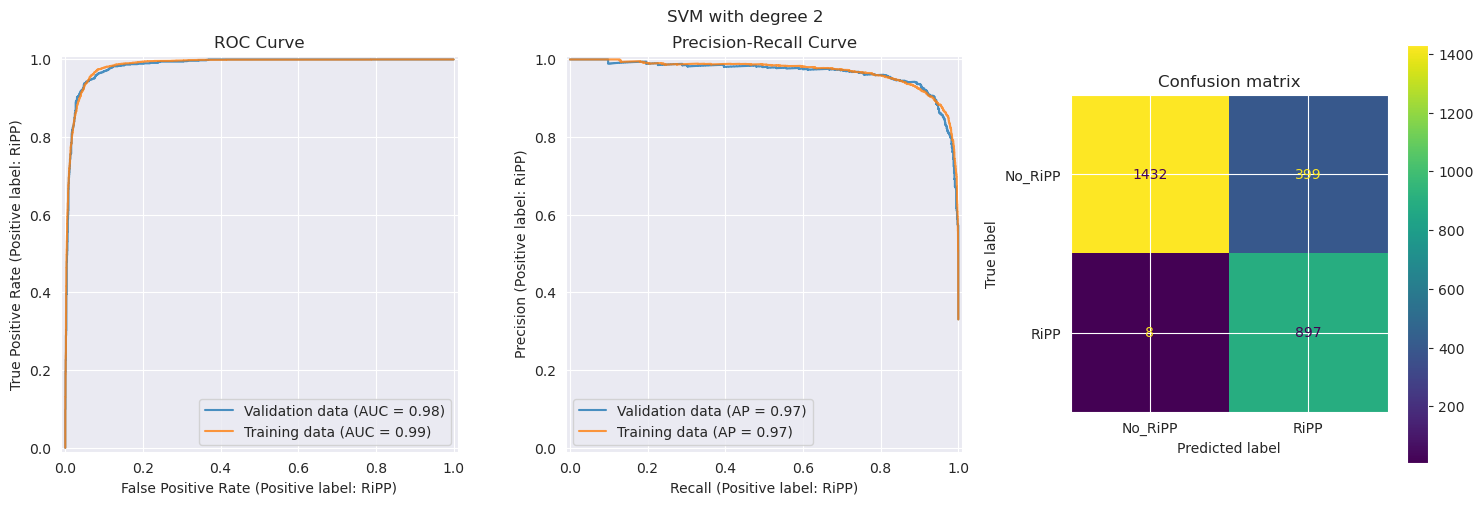

Feature length: 0.087 ± 0.004
Feature charge: 0.041 ± 0.005
Feature boman: 0.026 ± 0.005
Feature PRIN1: 0.023 ± 0.003
Feature aliphatic: 0.017 ± 0.002
Feature ProtFP1: 0.011 ± 0.001
Feature instability: 0.011 ± 0.006
Feature SVGER11: 0.006 ± 0.003
Feature PRIN2: 0.004 ± 0.002
Feature SVGER10: 0.004 ± 0.002
Feature ProtFP2: 0.003 ± 0.002
Feature PRIN3: 0.003 ± 0.002
Feature Z4: 0.003 ± 0.001
Feature ProtFP3: 0.003 ± 0.002
Feature SVGER7: 0.002 ± 0.002
Feature SVGER4: 0.002 ± 0.001
Feature SVGER6: 0.001 ± 0.002
Feature T1: 0.001 ± 0.001
Feature Z2: 0.001 ± 0.001
Feature KF9: 0.001 ± 0.002
Feature F1: 0.001 ± 0.001
Feature KF4: 0.001 ± 0.001
Feature SVGER8: 0.001 ± 0.001
Feature PD2: 0.001 ± 0.001
Feature Z1: 0.001 ± 0.001
Feature KF6: 0.001 ± 0.001
Feature ProtFP5: 0.001 ± 0.001
Feature AF1: 0.001 ± 0.001
Feature ST2: 0.001 ± 0.000
Feature BLOSUM8: 0.000 ± 0.001
Feature AF3: 0.000 ± 0.002
Feature BLOSUM9: 0.000 ± 0.000
Feature BLOSUM4: 0.000 ± 0.001
Feature MSWHIM1: 0.000 ± 0.000
Feature

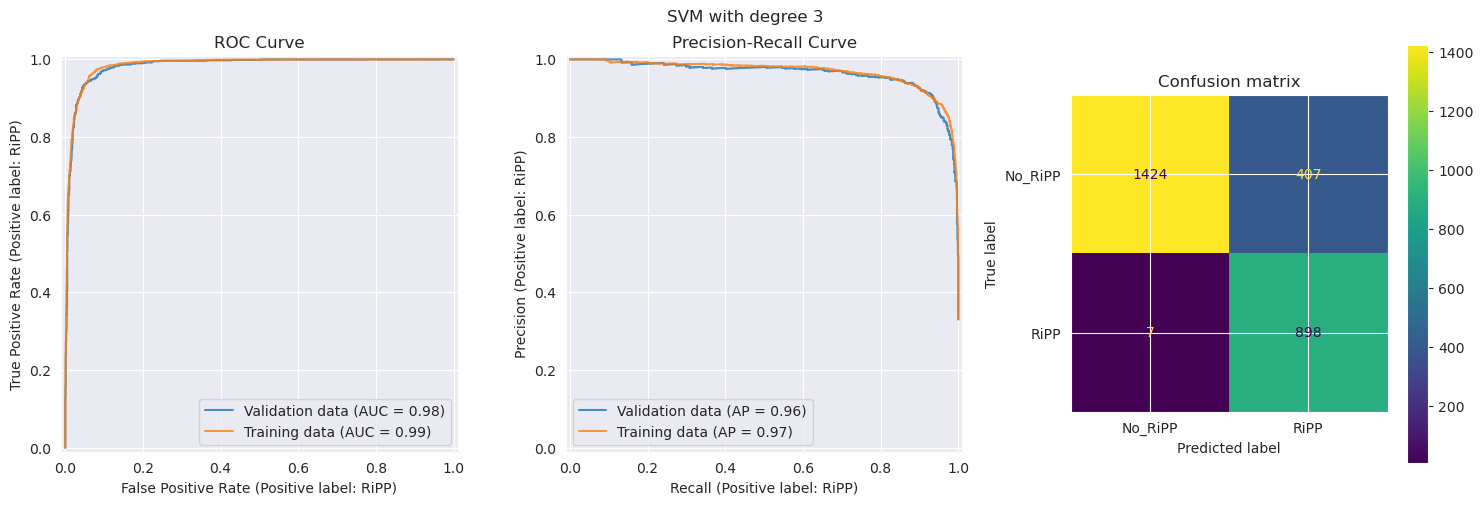

Feature length: 0.081 ± 0.005
Feature charge: 0.046 ± 0.004
Feature boman: 0.028 ± 0.003
Feature PRIN1: 0.026 ± 0.002
Feature aliphatic: 0.023 ± 0.004
Feature instability: 0.023 ± 0.004
Feature ProtFP1: 0.011 ± 0.002
Feature SVGER11: 0.003 ± 0.002
Feature SVGER10: 0.003 ± 0.003
Feature ProtFP2: 0.002 ± 0.002
Feature Z4: 0.002 ± 0.001
Feature SVGER8: 0.002 ± 0.001
Feature PRIN2: 0.002 ± 0.003
Feature KF9: 0.002 ± 0.001
Feature PD2: 0.002 ± 0.001
Feature PRIN3: 0.002 ± 0.002
Feature SVGER6: 0.001 ± 0.001
Feature T2: 0.001 ± 0.001
Feature F1: 0.001 ± 0.001
Feature AF1: 0.001 ± 0.001
Feature BLOSUM7: 0.001 ± 0.001
Feature ProtFP3: 0.001 ± 0.001
Feature AF4: 0.001 ± 0.000
Feature PP1: 0.001 ± 0.000
Feature SVGER1: 0.001 ± 0.001
Feature Z1: 0.001 ± 0.001
Feature ST8: 0.001 ± 0.001
Feature SVGER7: 0.001 ± 0.002
Feature AF5: 0.001 ± 0.001
Feature KF4: 0.001 ± 0.001
Feature F5: 0.001 ± 0.001
Feature ST5: 0.001 ± 0.001
Feature VSTPV6: 0.001 ± 0.001
Feature ST6: 0.001 ± 0.001
Feature VHSE3: 0.001

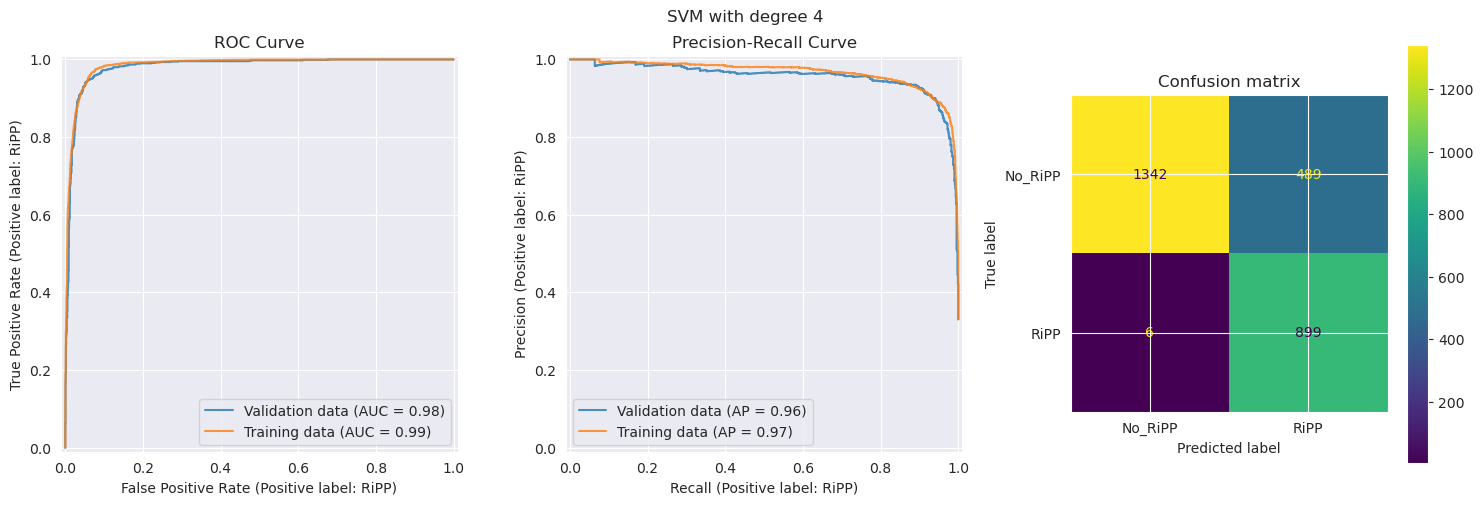

Feature length: 0.062 ± 0.004
Feature instability: 0.047 ± 0.005
Feature charge: 0.046 ± 0.004
Feature PRIN1: 0.024 ± 0.001
Feature boman: 0.022 ± 0.004
Feature aliphatic: 0.021 ± 0.003
Feature ProtFP1: 0.010 ± 0.002
Feature SVGER10: 0.003 ± 0.003
Feature SVGER7: 0.002 ± 0.001
Feature KF9: 0.001 ± 0.001
Feature SVGER8: 0.001 ± 0.000
Feature PRIN3: 0.001 ± 0.002
Feature ST3: 0.001 ± 0.000
Feature SV3: 0.000 ± 0.000
Feature Z1: 0.000 ± 0.001
Feature F1: 0.000 ± 0.001
Feature Z2: 0.000 ± 0.002
Feature SVGER5: 0.000 ± 0.000
Feature MSWHIM1: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature Z4: 0.000 ± 0.002
Feature T1: 0.000 ± 0.001
Feature DE: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature R: 0.000 ± 0.000
Feature cys_ser30: 0.000 ± 0.000
Feature PP2: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature F4: 0.000 ± 0.000
Feature T5: 0.000 ± 0.000
Feature MSWHIM3: 0.000 ± 0.000
Feature SVGER3: 0.000 ± 0.001
Featur

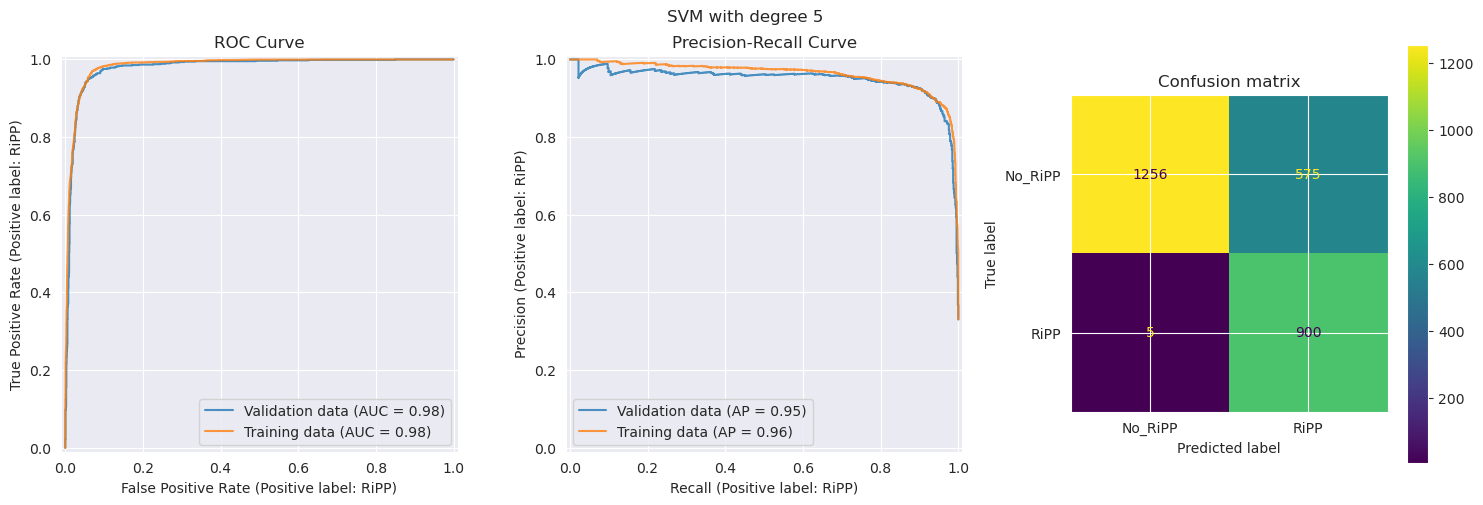

Feature instability: 0.080 ± 0.005
Feature charge: 0.050 ± 0.004
Feature length: 0.049 ± 0.003
Feature PRIN1: 0.026 ± 0.002
Feature boman: 0.024 ± 0.003
Feature aliphatic: 0.017 ± 0.002
Feature ProtFP1: 0.014 ± 0.002
Feature SVGER10: 0.009 ± 0.003
Feature SVGER7: 0.004 ± 0.002
Feature KF9: 0.004 ± 0.001
Feature SVGER8: 0.003 ± 0.001
Feature SVGER11: 0.003 ± 0.003
Feature F1: 0.002 ± 0.001
Feature ProtFP2: 0.002 ± 0.001
Feature ProtFP6: 0.001 ± 0.002
Feature Z2: 0.001 ± 0.001
Feature Z4: 0.001 ± 0.001
Feature Z5: 0.001 ± 0.001
Feature PRIN2: 0.001 ± 0.002
Feature T1: 0.001 ± 0.001
Feature F5: 0.001 ± 0.001
Feature AF3: 0.001 ± 0.000
Feature PRIN3: 0.001 ± 0.001
Feature PD2: 0.001 ± 0.001
Feature SVGER6: 0.001 ± 0.001
Feature ProtFP3: 0.001 ± 0.002
Feature T2: 0.001 ± 0.001
Feature VHSE7: 0.000 ± 0.000
Feature Z1: 0.000 ± 0.000
Feature MSWHIM2: 0.000 ± 0.000
Feature VHSE3: 0.000 ± 0.000
Feature VSTPV2: 0.000 ± 0.001
Feature BLOSUM3: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature SVGER9: 

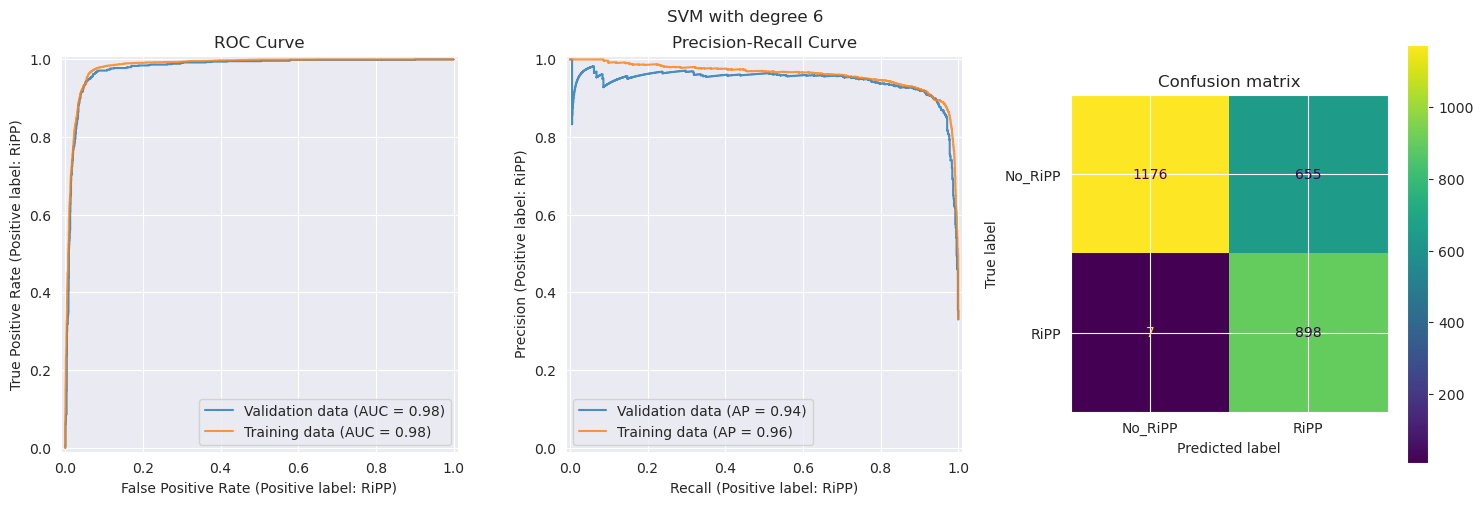

Feature instability: 0.094 ± 0.006
Feature charge: 0.050 ± 0.004
Feature length: 0.038 ± 0.003
Feature PRIN1: 0.027 ± 0.002
Feature boman: 0.023 ± 0.005
Feature ProtFP1: 0.016 ± 0.001
Feature SVGER10: 0.012 ± 0.003
Feature aliphatic: 0.011 ± 0.003
Feature SVGER8: 0.005 ± 0.001
Feature SVGER7: 0.004 ± 0.001
Feature KF9: 0.003 ± 0.002
Feature Z4: 0.002 ± 0.001
Feature Z1: 0.002 ± 0.001
Feature ProtFP3: 0.002 ± 0.002
Feature PD2: 0.002 ± 0.001
Feature SVGER6: 0.002 ± 0.001
Feature F1: 0.002 ± 0.001
Feature Z2: 0.002 ± 0.001
Feature KF10: 0.001 ± 0.000
Feature SVGER2: 0.001 ± 0.001
Feature PP1: 0.001 ± 0.000
Feature PRIN2: 0.001 ± 0.001
Feature BLOSUM7: 0.001 ± 0.001
Feature BLOSUM4: 0.001 ± 0.001
Feature T1: 0.001 ± 0.001
Feature T2: 0.001 ± 0.001
Feature ST5: 0.001 ± 0.001
Feature ProtFP5: 0.001 ± 0.001
Feature AF3: 0.001 ± 0.001
Feature VHSE4: 0.001 ± 0.000
Feature ProtFP4: 0.001 ± 0.001
Feature ProtFP2: 0.001 ± 0.001
Feature SVGER1: 0.001 ± 0.001
Feature ProtFP8: 0.001 ± 0.000
Feature 

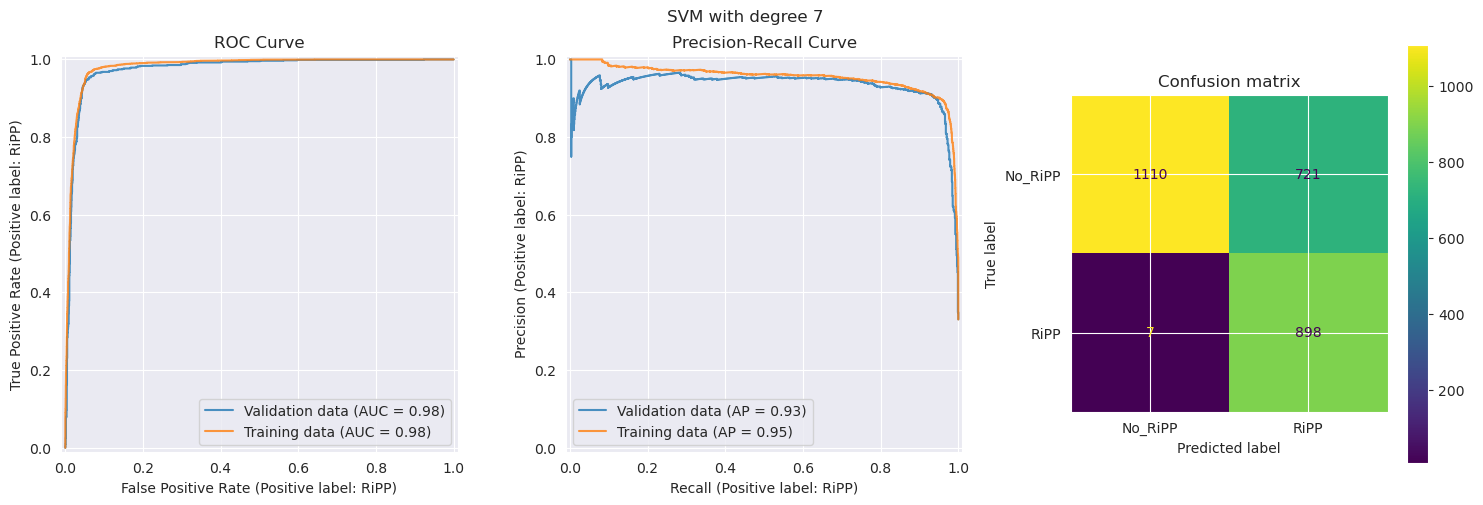

Feature instability: 0.096 ± 0.006
Feature charge: 0.045 ± 0.003
Feature length: 0.033 ± 0.005
Feature PRIN1: 0.023 ± 0.002
Feature boman: 0.021 ± 0.003
Feature ProtFP1: 0.015 ± 0.001
Feature SVGER10: 0.012 ± 0.003
Feature SVGER7: 0.005 ± 0.002
Feature aliphatic: 0.005 ± 0.003
Feature KF9: 0.003 ± 0.001
Feature ProtFP3: 0.003 ± 0.002
Feature SVGER8: 0.003 ± 0.002
Feature PRIN3: 0.002 ± 0.001
Feature T1: 0.002 ± 0.002
Feature Z2: 0.001 ± 0.001
Feature SVGER11: 0.001 ± 0.002
Feature Z4: 0.001 ± 0.001
Feature ProtFP4: 0.001 ± 0.001
Feature F5: 0.001 ± 0.001
Feature VHSE8: 0.001 ± 0.001
Feature cys_ser20: 0.001 ± 0.000
Feature Z1: 0.001 ± 0.001
Feature F6: 0.001 ± 0.001
Feature MSWHIM3: 0.000 ± 0.000
Feature F1: 0.000 ± 0.000
Feature VSTPV3: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature VHSE5: 0.000 ± 0.000
Feature ST3: 0.000 ± 0.000
Feature ST5: 0.000 ± 0.001
Feature avghydrop: 0.000 ± 0.000
Feature VHSE2: 0.000 ± 0.000
Feature BLOSUM3: 0.000 ± 0.000
Feature ST2: 0.000 ± 0.000
Feature

In [5]:
x_train, x_test, y_train, y_test = svm_training_split('/lustre/BIF/nobackup/sanz006/training_dataset.csv',feature_list=complete_features)
svc_classification(x_train, x_test, y_train, y_test,feature_list=complete_features)

Same dataset but using the original features + Boman, aliphatic and instability

         No_RiPP  RiPP
No_RiPP     3515   486
RiPP          48    52


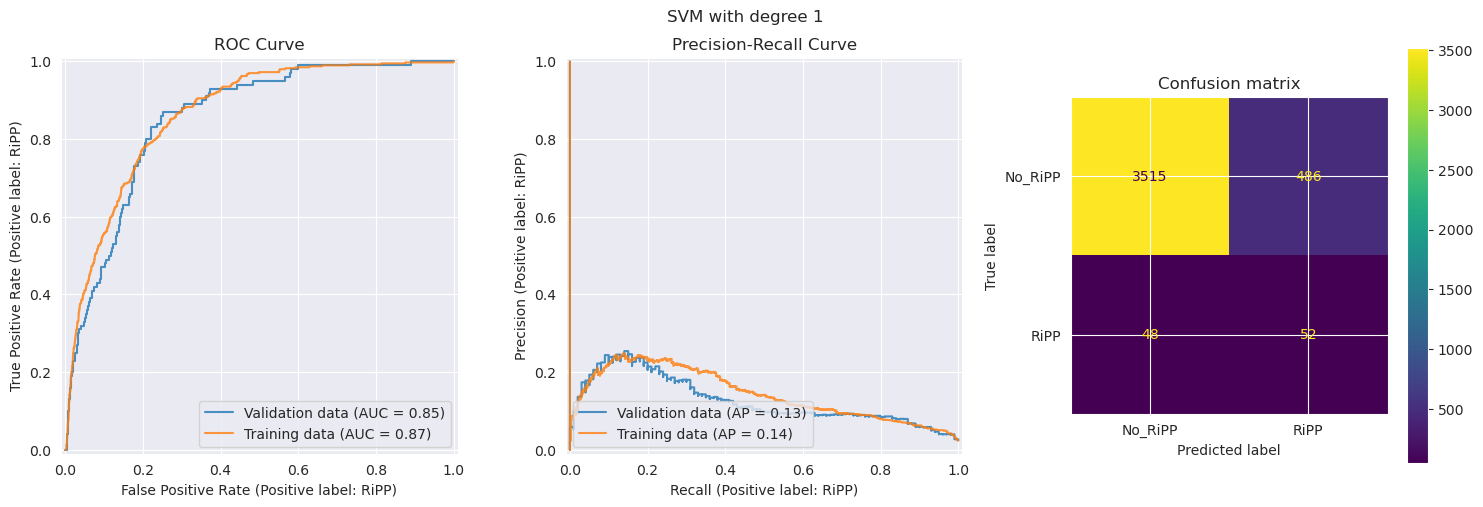

Feature length: 0.046 ± 0.003
Feature aliphatic: 0.014 ± 0.003
Feature charge: 0.008 ± 0.002
Feature instability: 0.006 ± 0.004
Feature STNQ: 0.000 ± 0.000
Feature cys_ser30: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.001
Feature MFYW: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature P: -0.000 ± 0.000
Feature D: -0.000 ± 0.000
Feature H: -0.000 ± 0.000
Feature V: -0.000 ± 0.000
Feature entropy: -0.000 ± 0.000
Feature E: -0.000 ± 0.000
Feature cys30: -0.000 ± 0.000
Feature S: -0.000 ± 0.000
Feature cys20: -0.000 ± 0.001
Feature DE: -0.000 ± 0.000
Feature C: -0.000 ± 0.000
Feature entropyratio: -0.000 ± 0.001
Feature R: -0.000 ± 0.00

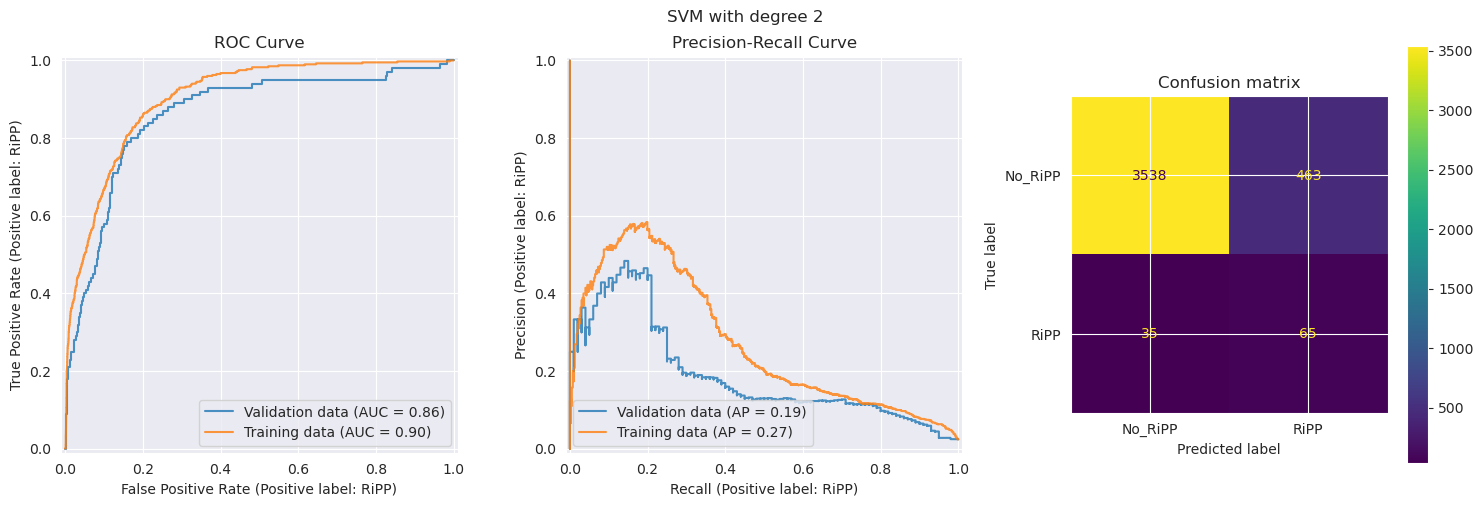

Feature aliphatic: 0.082 ± 0.005
Feature length: 0.079 ± 0.002
Feature instability: 0.038 ± 0.003
Feature charge: 0.028 ± 0.003
Feature cys_ser20: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature cys20: 0.000 ± 0.000
Feature MFYW: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature cys30: 0.000 ± 0.000
Feature cys_ser30: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature R: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature entropyratio: -0.000 ± 0.000
Feature G: -0.000 ± 0.000
Featu

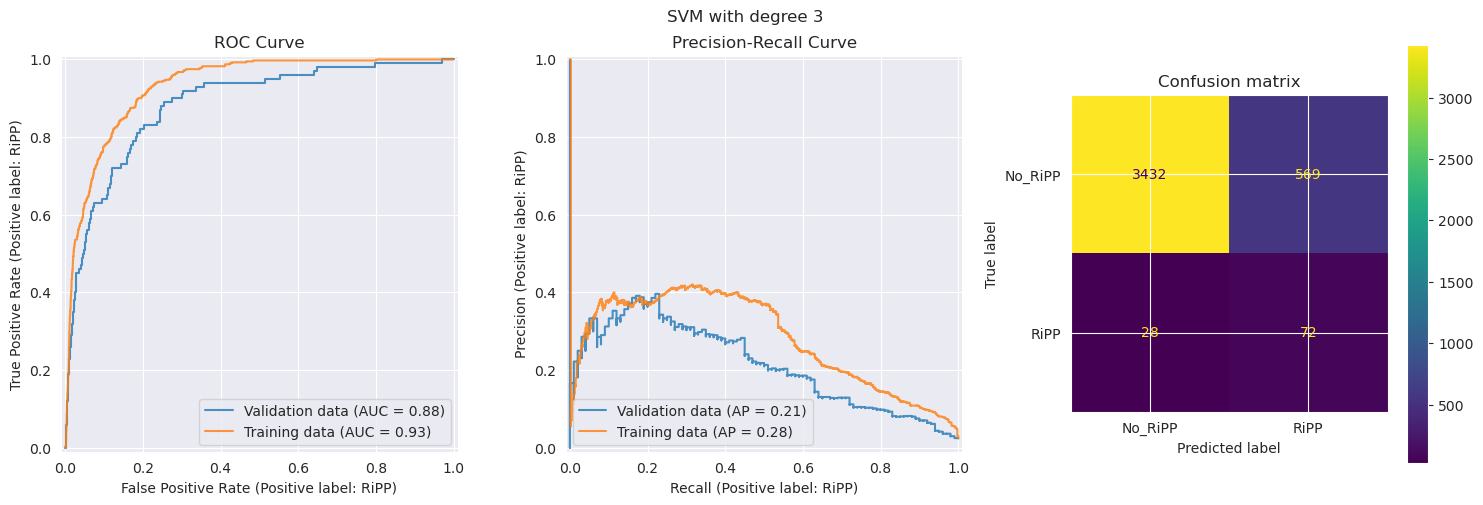

Feature instability: 0.057 ± 0.005
Feature length: 0.039 ± 0.002
Feature charge: 0.018 ± 0.003
Feature aliphatic: 0.002 ± 0.002
Feature cys_ser20: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature MFYW: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature G: -0.000 ± 0.000
Feature cys_ser30: -0.000 ± 0.000
Feature avghydrop: -0.000 ± 0.000
Feature CGP: -0.000 ± 0.000
Feature RHK: -0.000 ± 0.000
Feature avgcharge: -0.000 ± 0.000
Feature cys30: -0.000 ± 0.000
Feature STNQ: -0.000 ± 0.000
Feature R: -0.000 ± 0.000
Feature K: -0.000 ± 0.000
Featur

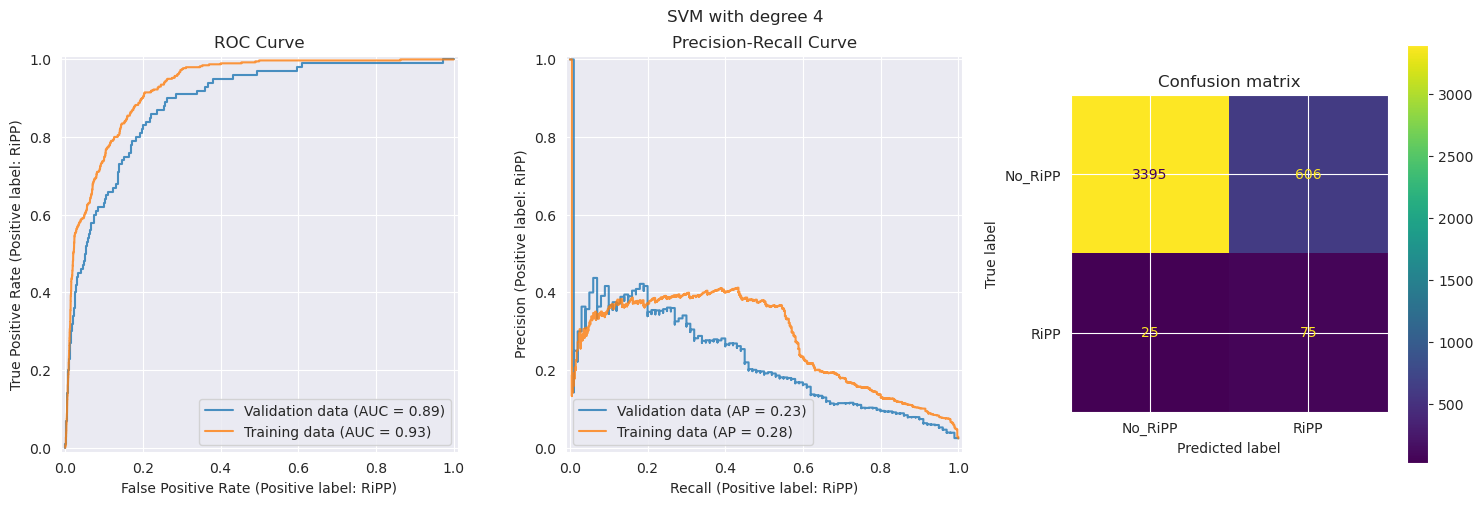

Feature instability: 0.087 ± 0.005
Feature length: 0.043 ± 0.002
Feature charge: 0.023 ± 0.003
Feature aliphatic: 0.011 ± 0.003
Feature cys_ser20: 0.000 ± 0.000
Feature cys_ser30: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature MFYW: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature RHK: -0.000 ± 0.000
Feature cys30: -0.000 ± 0.000
Feature R: -0.000 ± 0.000
Feature entro

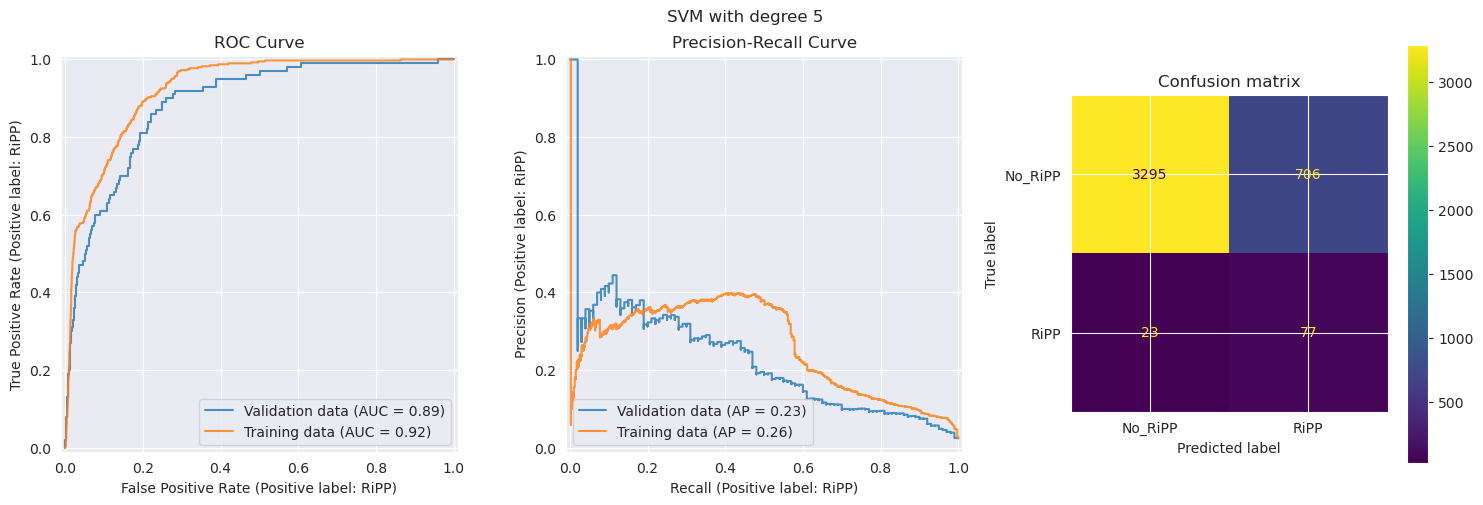

Feature instability: 0.101 ± 0.004
Feature length: 0.042 ± 0.003
Feature charge: 0.021 ± 0.002
Feature aliphatic: 0.017 ± 0.005
Feature cys_ser20: 0.001 ± 0.000
Feature cys_ser30: 0.001 ± 0.000
Feature CGP: 0.001 ± 0.000
Feature STNQ: 0.001 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature cys20: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature cys30: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature MFYW: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature R: -

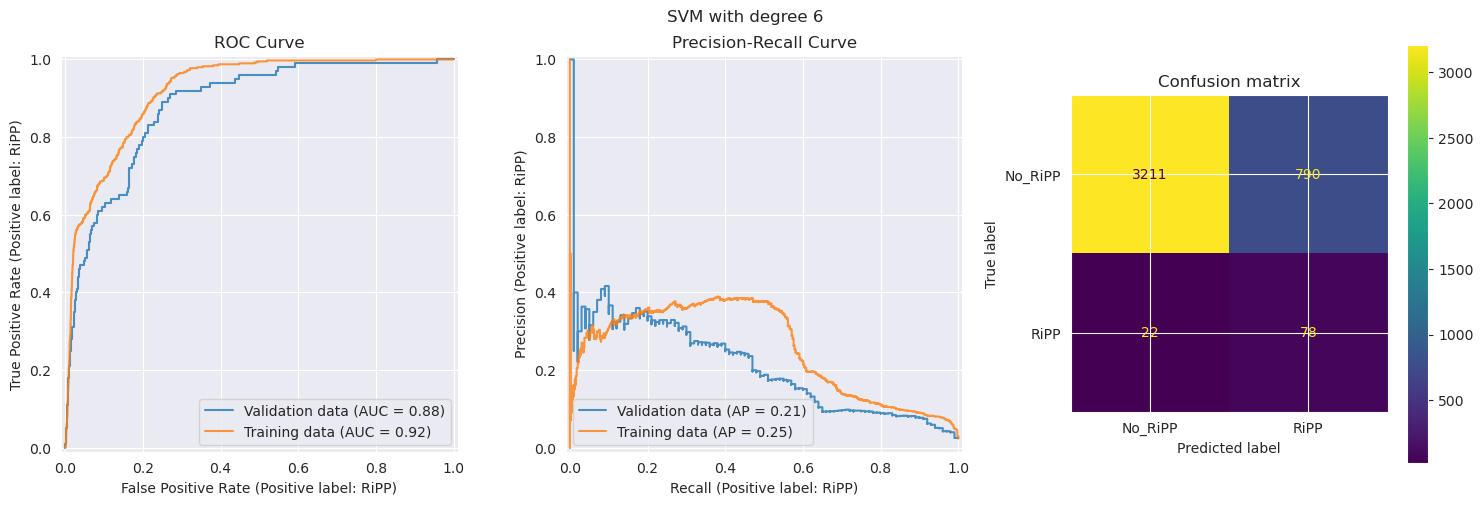

Feature instability: 0.110 ± 0.004
Feature length: 0.044 ± 0.002
Feature charge: 0.021 ± 0.002
Feature aliphatic: 0.014 ± 0.003
Feature CGP: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature cys20: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature cys30: -0.000 ± 0.000
Feature H: -0.000 ± 0.000
Feature P: -0.000 ± 0.000
Feature F: -0.000 ± 0.000
Feature MFYW: -0.000 ± 0.000
Feature avgcharge: -0.000 ± 0.000
Feature C: -0.000 ± 0.000
Feature RHK: -0.000 ± 0.000
Feature V: -0.000 ± 0.000
Feature L: -0.000 ± 0.000
Feature AVIL: -0.000 ± 0.000
Feature S: -0.000 ± 0.000
Feature R: -0.000 ± 0.000
Feature cys_ser30: -0.000 ± 0.000
Feature K: -0.000 ± 0.000
Feature avghydrop: -0.000 ± 0.000
Feature T: -0.000 ± 0.000
Feature cys_ser20: -0.000 ± 0.0

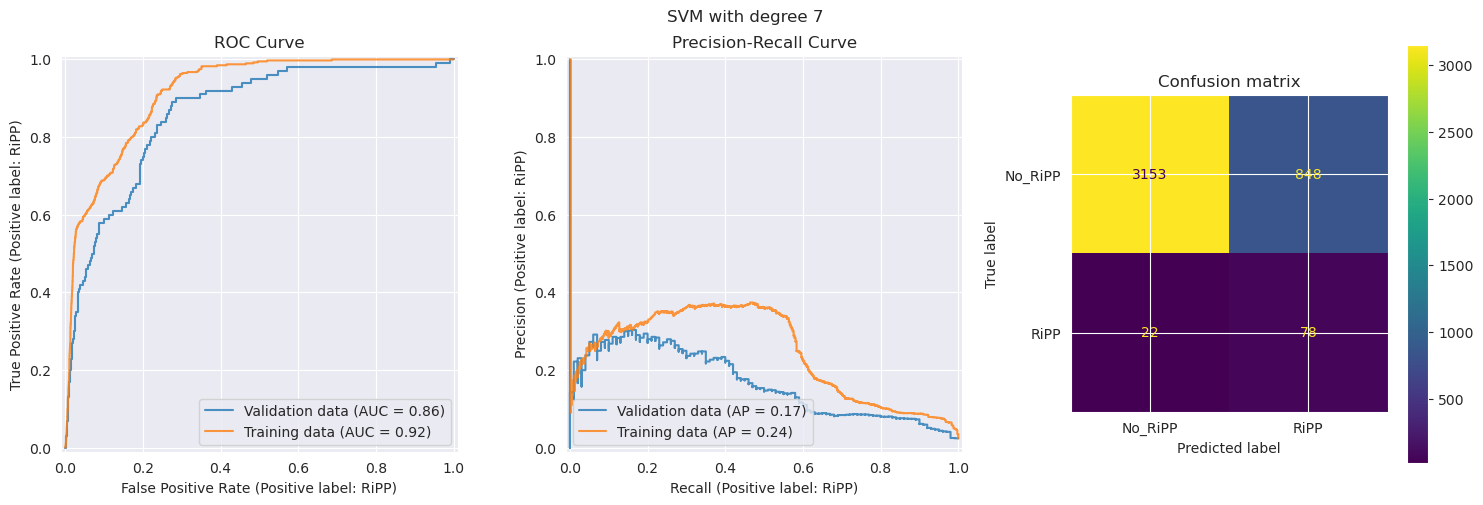

Feature instability: 0.114 ± 0.004
Feature length: 0.044 ± 0.002
Feature charge: 0.020 ± 0.003
Feature cys20: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature cys30: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature MFYW: -0.000 ± 0.000
Feature R: -0.000 ± 0.000
Feature cys_ser30: -0.000 ± 0.000
Feature STNQ: -0.000 ± 0.000
Feature entropyratio: -0.000 ± 0.000
Feature CGP: -0.000 ± 0.000
Featur

In [4]:
x_train, x_test, y_train, y_test = svm_training_split('/lustre/BIF/nobackup/sanz006/training_dataset.csv',feature_list=original_features)
svc_classification(x_train, x_test, y_train, y_test,feature_list=original_features)

Next cells will make an attempt to determine whether the increase in our dataset (500 proteins) vs the original paper (137 proteins) has had a positive effect

In [5]:
def svm_training_split_reduced(dataset_file,feature_list):
    dataset = pd.read_csv(dataset_file)
    dataset = dataset.drop(labels="sequence", axis=1)
    dataset=dataset.iloc[364:]
    x = dataset[feature_list]
    y = dataset[["RiPP"]].to_numpy().ravel()
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2,random_state=42)
    return x_train, x_test, y_train, y_test

         No_RiPP  RiPP
No_RiPP     4001     0
RiPP          27     0


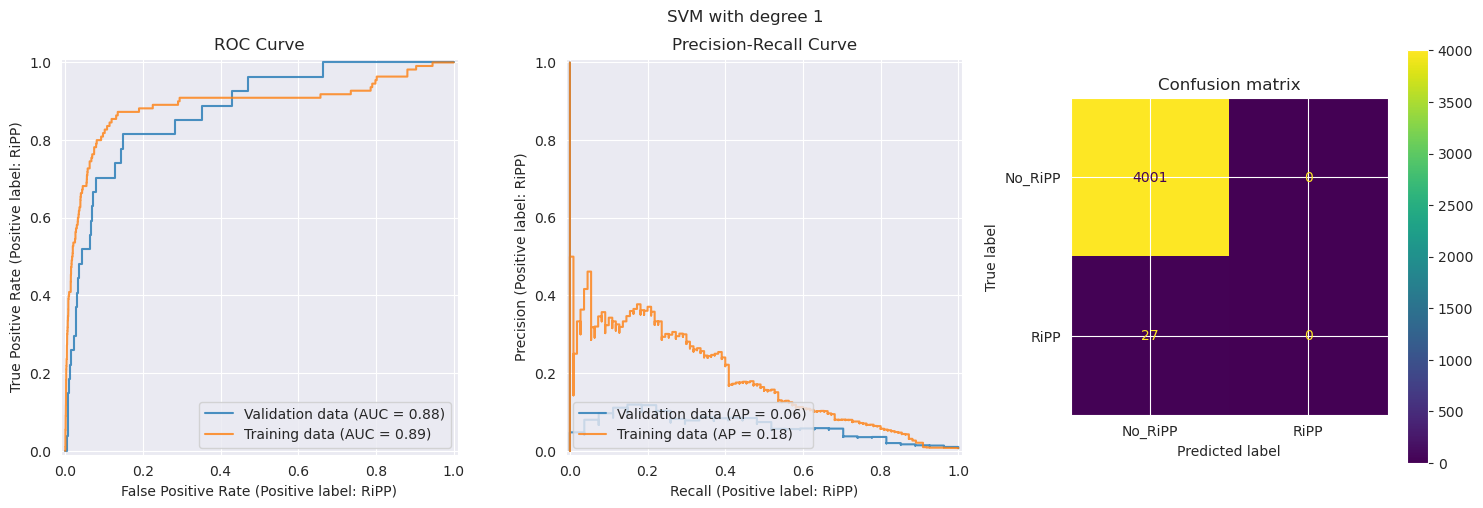

Feature MFYW: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature R: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature aliphatic: 0.000 ± 0.000
Feature instability: 0.000 ± 0.000
Feature boman: 0.000 ± 0.000
Feature entropyratio: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature length: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature charge: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature cys_s

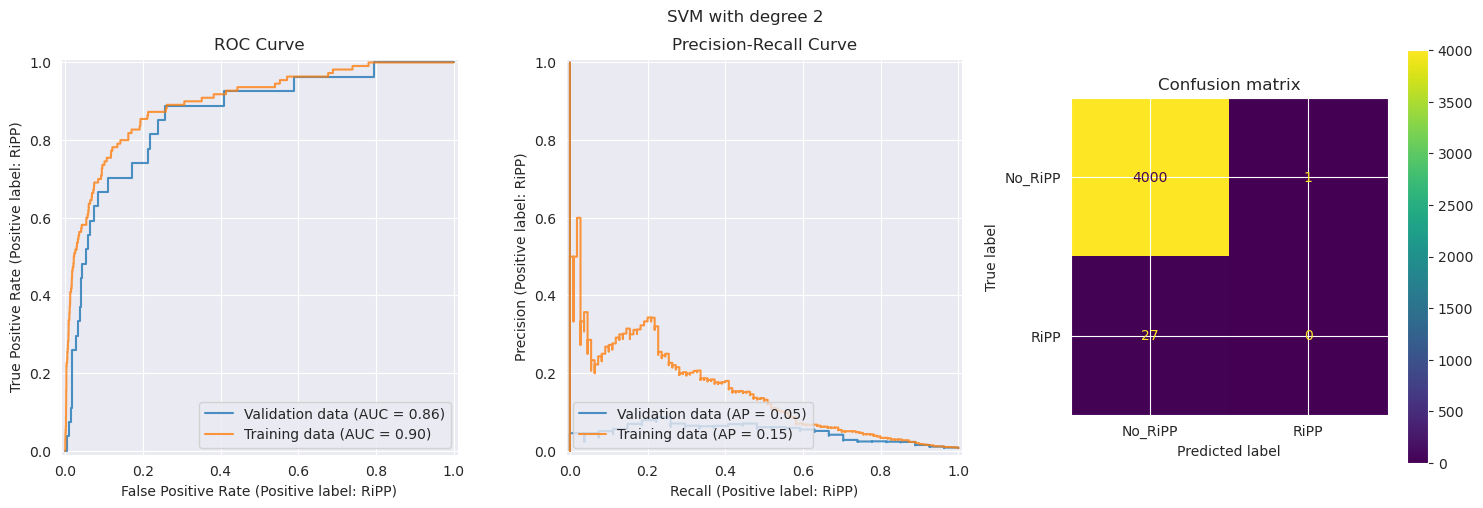

Feature aliphatic: 0.004 ± 0.001
Feature length: 0.001 ± 0.000
Feature instability: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature MFYW: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature R: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature boman: 0.000 ± 0.000
Feature entropyratio: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature cys_ser30: 0.000 ± 0.000
Feature cy

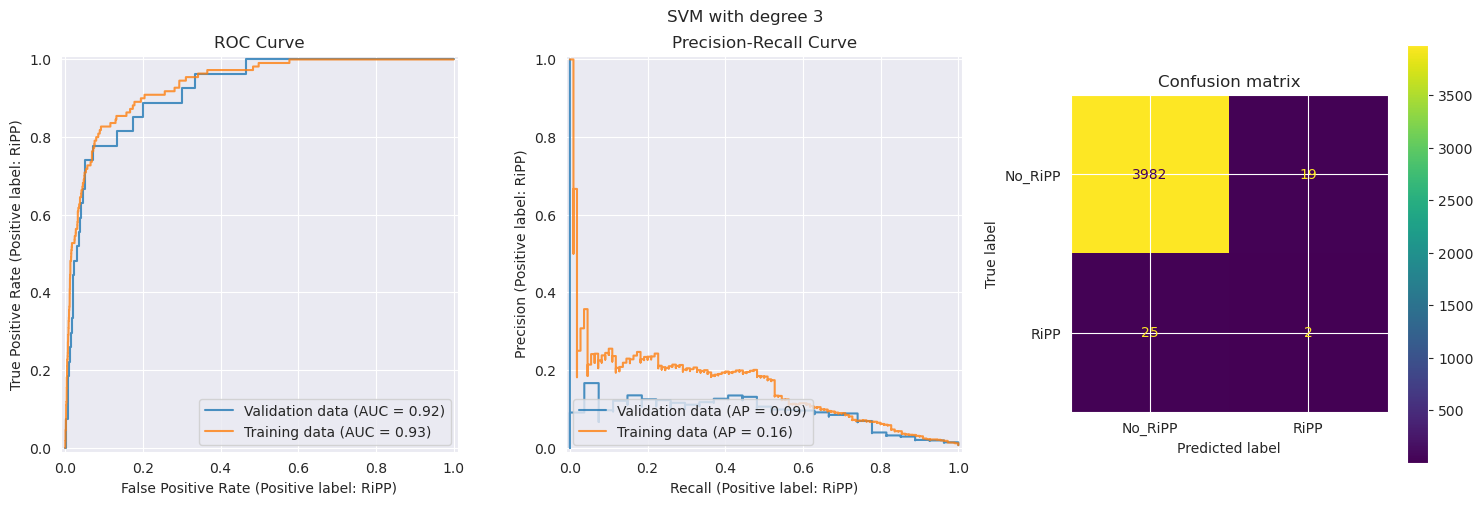

Feature length: 0.018 ± 0.001
Feature aliphatic: 0.010 ± 0.002
Feature instability: 0.009 ± 0.001
Feature charge: 0.003 ± 0.001
Feature SVGER4: 0.000 ± 0.000
Feature boman: 0.000 ± 0.000
Feature ProtFP6: 0.000 ± 0.000
Feature ProtFP2: 0.000 ± 0.000
Feature MFYW: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature R: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature entropyratio: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.

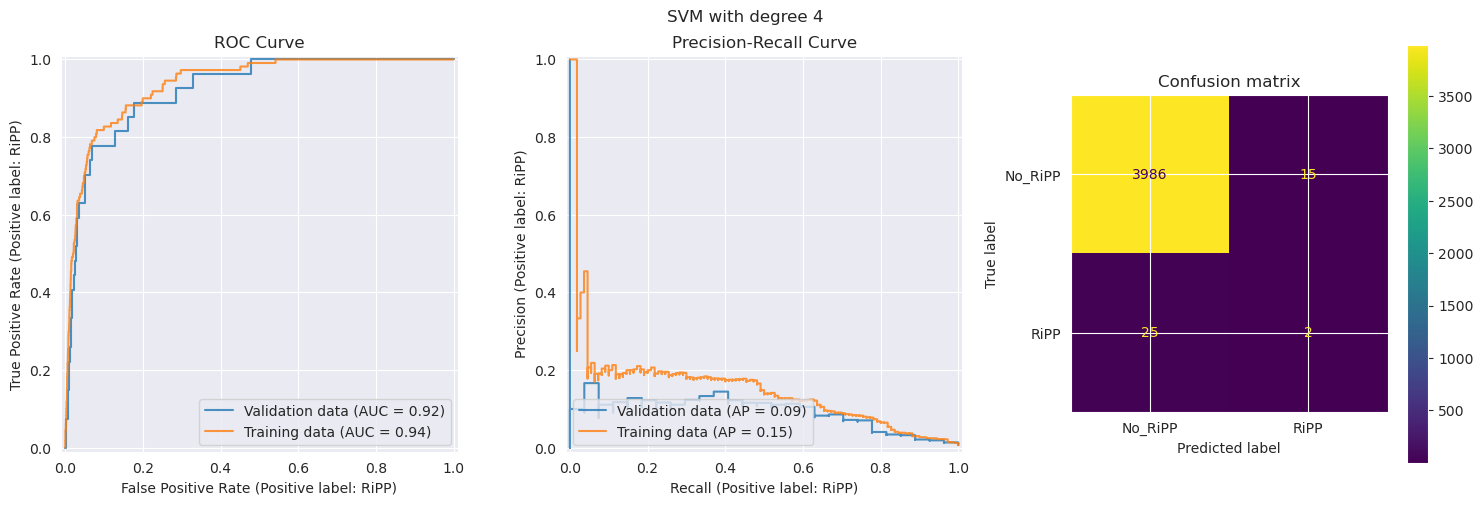

Feature length: 0.012 ± 0.001
Feature instability: 0.010 ± 0.001
Feature aliphatic: 0.004 ± 0.001
Feature charge: 0.003 ± 0.002
Feature SVGER4: 0.000 ± 0.000
Feature KF5: 0.000 ± 0.000
Feature ProtFP7: 0.000 ± 0.000
Feature AF3: 0.000 ± 0.000
Feature Z5: 0.000 ± 0.000
Feature ProtFP5: 0.000 ± 0.000
Feature BLOSUM8: 0.000 ± 0.000
Feature KF9: 0.000 ± 0.000
Feature ProtFP6: 0.000 ± 0.000
Feature AF2: 0.000 ± 0.000
Feature ProtFP8: 0.000 ± 0.000
Feature F2: 0.000 ± 0.000
Feature KF1: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature MFYW: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature Z1: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature M: 0.000 ± 

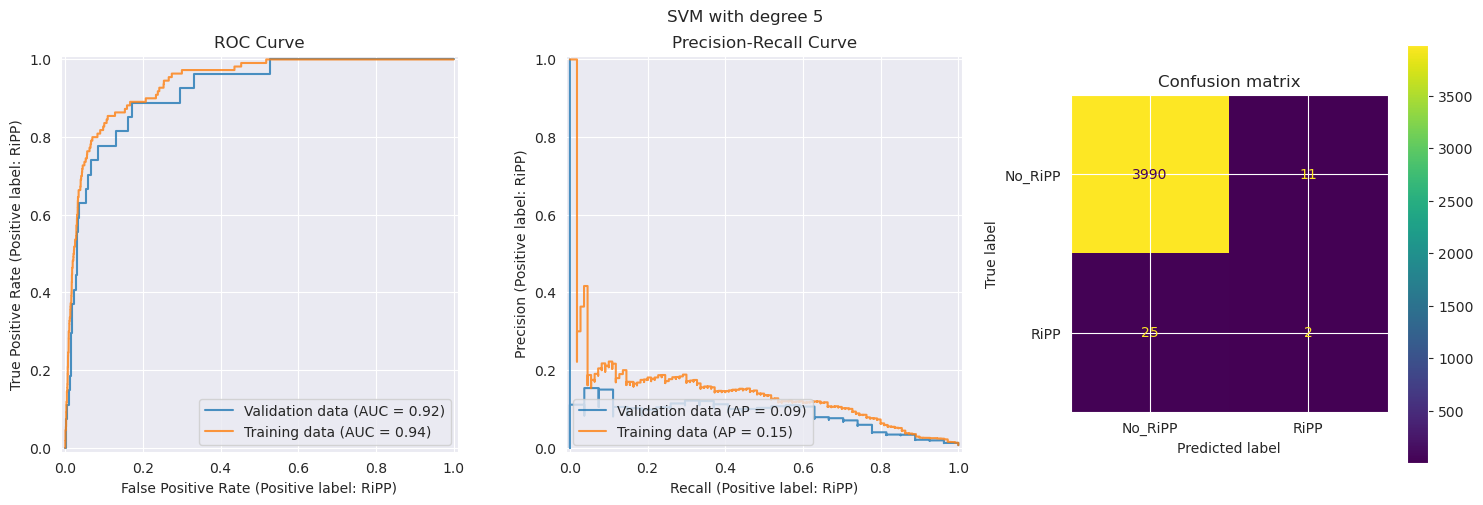

Feature instability: 0.009 ± 0.000
Feature length: 0.007 ± 0.001
Feature charge: 0.002 ± 0.001
Feature aliphatic: 0.001 ± 0.001
Feature PRIN1: 0.000 ± 0.000
Feature SVGER1: 0.000 ± 0.000
Feature ProtFP1: 0.000 ± 0.000
Feature Z4: 0.000 ± 0.000
Feature SVGER7: 0.000 ± 0.000
Feature ProtFP2: 0.000 ± 0.000
Feature PRIN3: 0.000 ± 0.000
Feature PRIN2: 0.000 ± 0.000
Feature PD1: 0.000 ± 0.000
Feature SVGER11: 0.000 ± 0.000
Feature Z2: 0.000 ± 0.000
Feature ProtFP7: 0.000 ± 0.000
Feature SVGER4: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature MFYW: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature cys_ser30: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature R: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feat

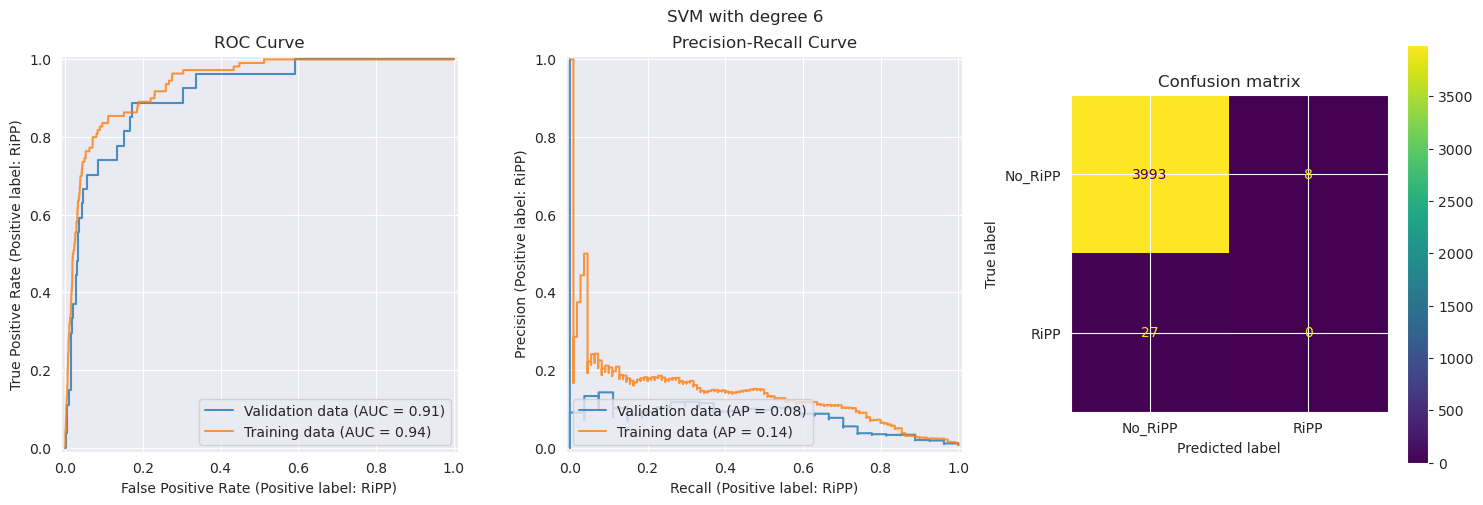

Feature instability: 0.006 ± 0.001
Feature length: 0.004 ± 0.001
Feature charge: 0.001 ± 0.001
Feature aliphatic: 0.001 ± 0.001
Feature PRIN1: 0.000 ± 0.000
Feature SVGER11: 0.000 ± 0.000
Feature ProtFP1: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature MFYW: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature R: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature boman: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature entropyratio: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.0

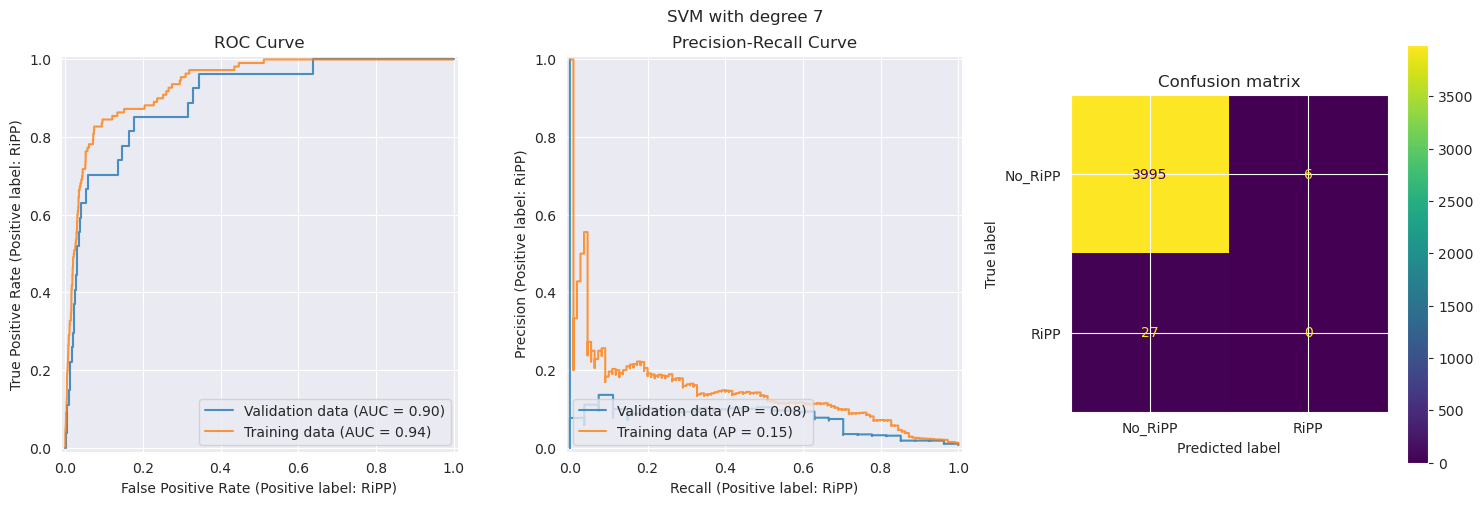

Feature instability: 0.004 ± 0.001
Feature length: 0.003 ± 0.001
Feature aliphatic: 0.002 ± 0.001
Feature charge: 0.001 ± 0.001
Feature PRIN1: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature MFYW: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature R: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature boman: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature entropyratio: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature c

In [6]:
x_train, x_test, y_train, y_test = svm_training_split_reduced('/lustre/BIF/nobackup/sanz006/training_dataset.csv',feature_list=complete_features)
svc_classification(x_train, x_test, y_train, y_test,feature_list=complete_features)

         No_RiPP  RiPP
No_RiPP     4001     0
RiPP          27     0


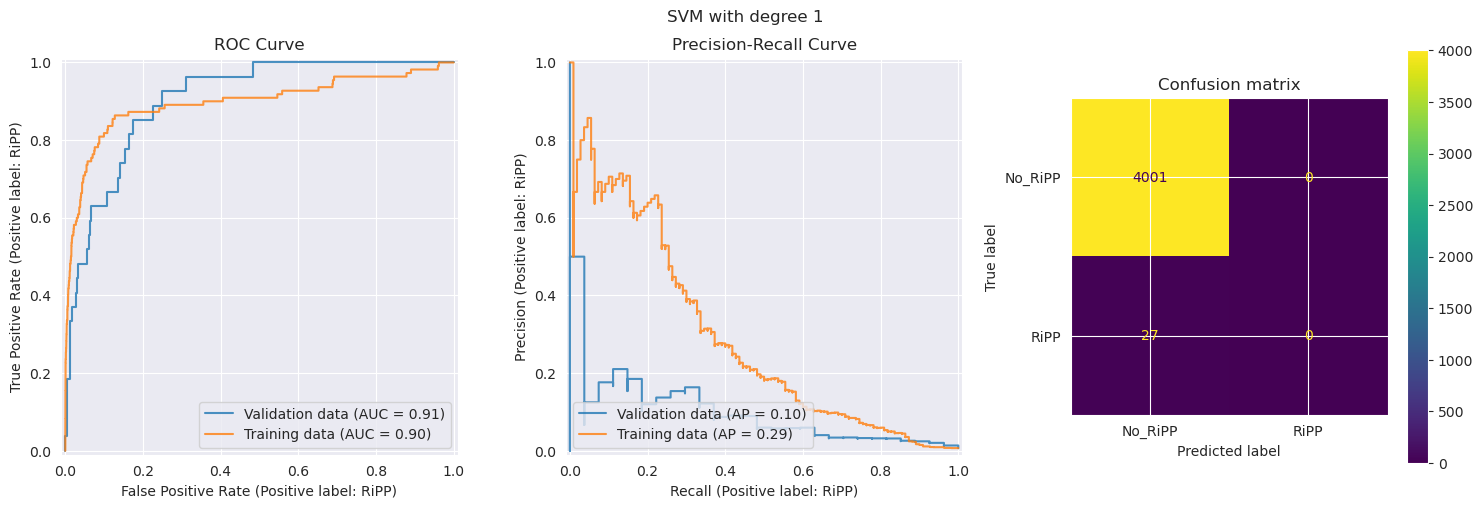

Feature MFYW: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature R: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature aliphatic: 0.000 ± 0.000
Feature instability: 0.000 ± 0.000
Feature boman: 0.000 ± 0.000
Feature entropyratio: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature length: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature charge: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature cys_s

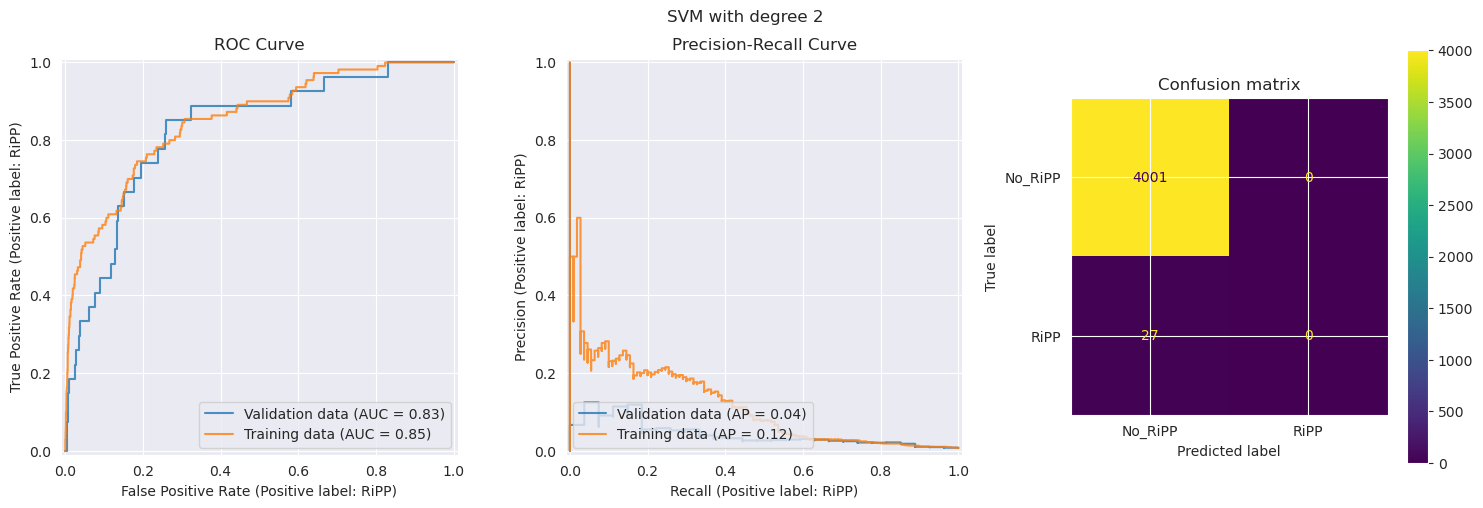

Feature MFYW: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature R: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature aliphatic: 0.000 ± 0.000
Feature instability: 0.000 ± 0.000
Feature boman: 0.000 ± 0.000
Feature entropyratio: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature length: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature charge: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature cys_s

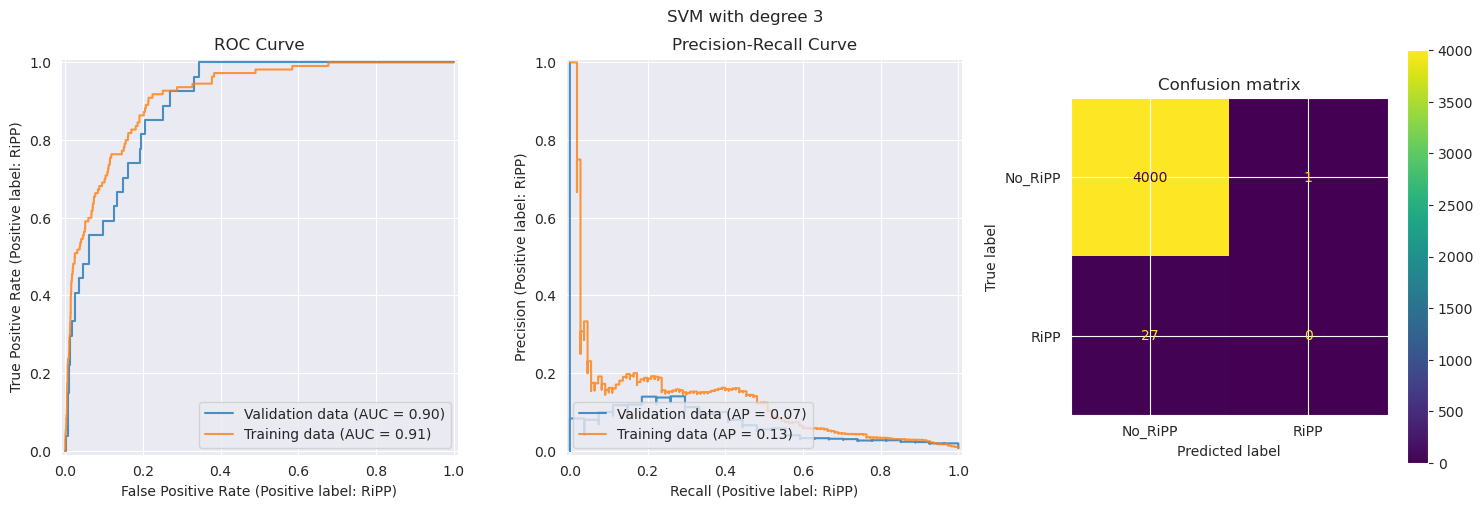

Feature length: 0.006 ± 0.001
Feature instability: 0.004 ± 0.001
Feature charge: 0.004 ± 0.001
Feature aliphatic: 0.001 ± 0.001
Feature MFYW: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature boman: 0.000 ± 0.000
Feature R: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature entropyratio: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature cys_s

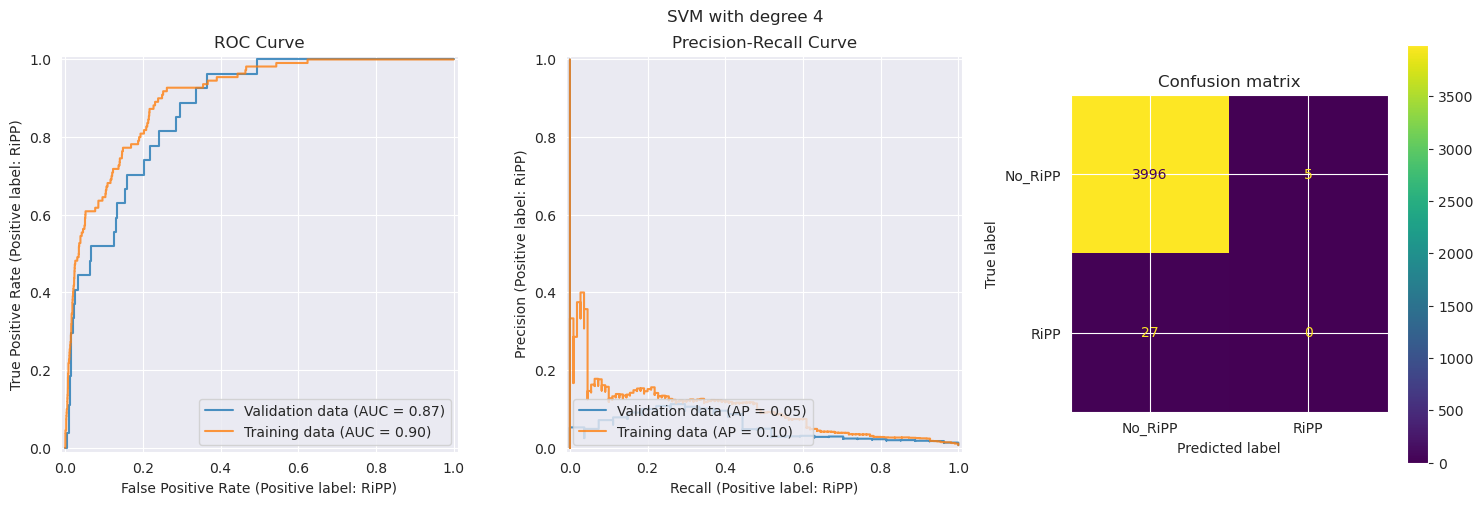

Feature length: 0.012 ± 0.001
Feature instability: 0.011 ± 0.001
Feature charge: 0.006 ± 0.001
Feature aliphatic: 0.001 ± 0.000
Feature MFYW: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature boman: 0.000 ± 0.000
Feature R: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature entropyratio: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature cys_s

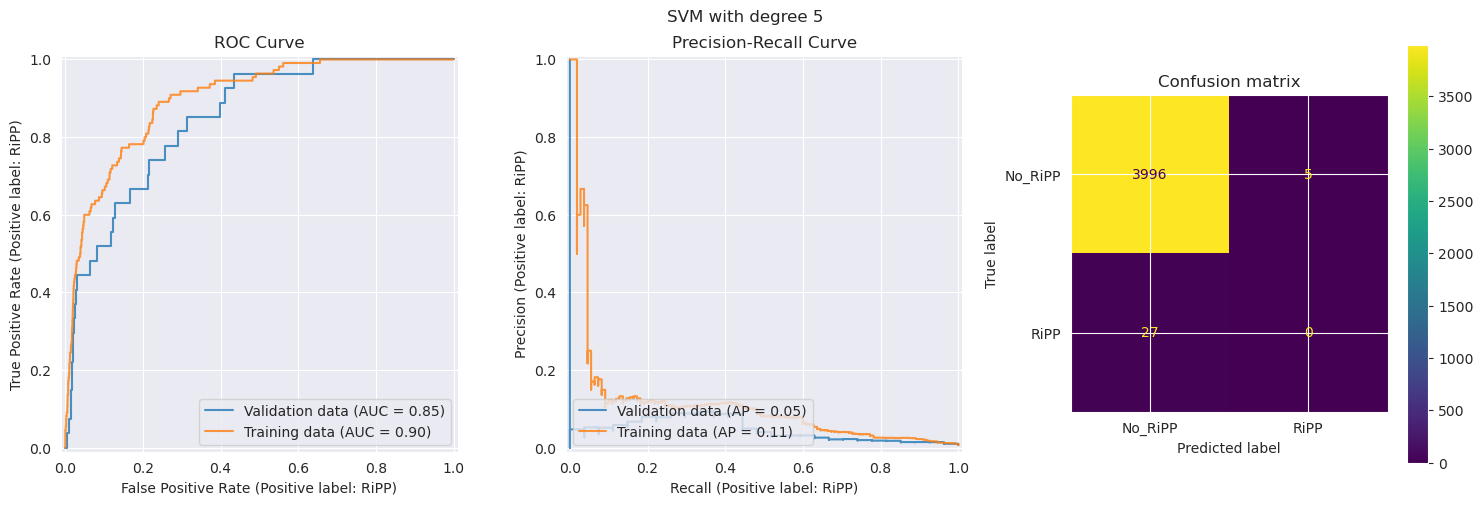

Feature instability: 0.008 ± 0.001
Feature length: 0.006 ± 0.001
Feature charge: 0.004 ± 0.001
Feature aliphatic: 0.000 ± 0.000
Feature entropyratio: 0.000 ± 0.000
Feature boman: 0.000 ± 0.000
Feature MFYW: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature R: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature cys_s

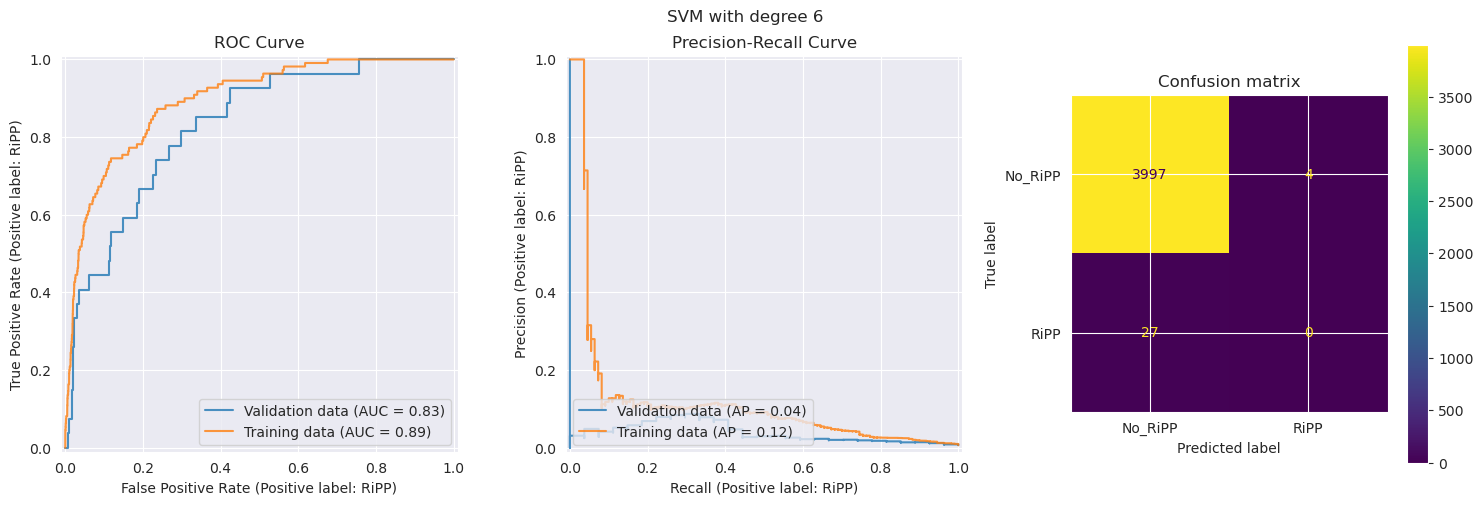

Feature charge: 0.004 ± 0.001
Feature instability: 0.003 ± 0.001
Feature length: 0.003 ± 0.000
Feature aliphatic: 0.001 ± 0.001
Feature boman: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature MFYW: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature R: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature cys20: 0.000 ± 0.000
Feature cys_ser30: 0

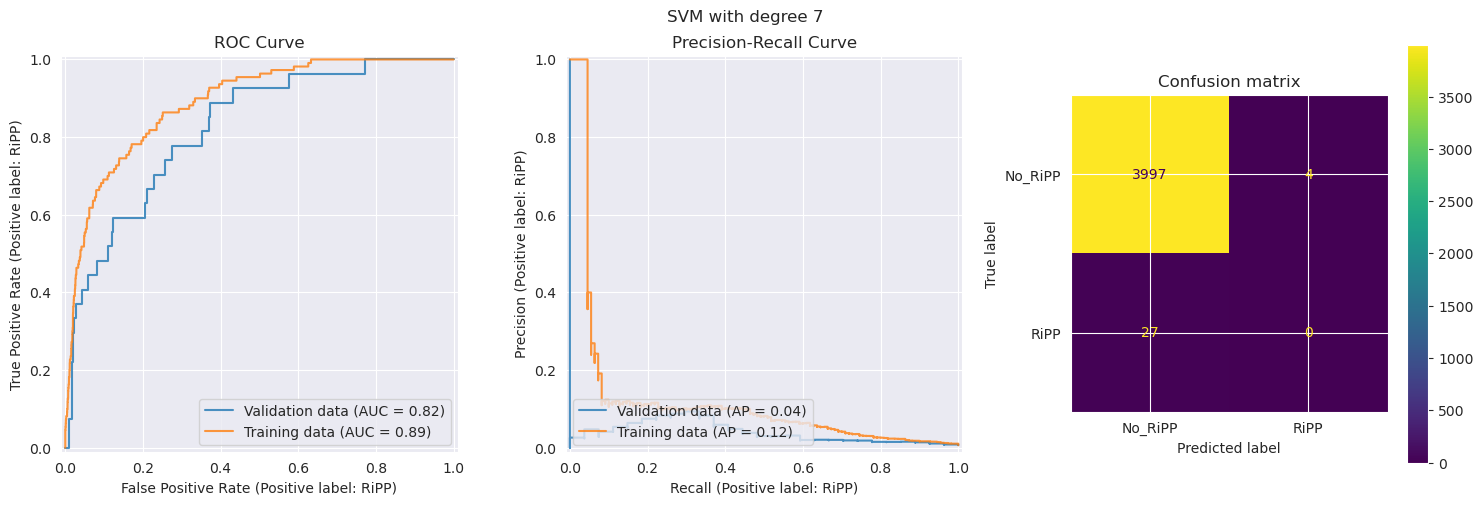

Feature charge: 0.004 ± 0.001
Feature length: 0.003 ± 0.001
Feature instability: 0.002 ± 0.001
Feature aliphatic: 0.002 ± 0.001
Feature boman: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature MFYW: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature R: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature entropyratio: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature cys_s

In [7]:
x_train, x_test, y_train, y_test = svm_training_split_reduced('/lustre/BIF/nobackup/sanz006/training_dataset.csv',feature_list=original_features)
svc_classification(x_train, x_test, y_train, y_test,feature_list=original_features)

Now we will use fewer features based on the feature importance plots

Feature selection, forward and backwards

In [3]:
def svc_feature_selection(dataset_file,feature_list):
        dataset = pd.read_csv(dataset_file)
        dataset = dataset.drop(labels="sequence", axis=1)
        x = dataset[feature_selection[:5]]#change back to complete features
        y = dataset[["RiPP"]].to_numpy().ravel()
        poly_svc = svm.SVC(C=10,kernel="poly",random_state=0,degree=3,class_weight='balanced')
        #poly_svc.fit(x_train, y_train)
        #f_importances(abs(poly_svc.coef_[0]),feature_list)
        print('Starting sfs')
        sfs = SequentialFeatureSelector(estimator=poly_svc, n_features_to_select='auto',direction='forward',n_jobs=10)
        print('fitting...')
        sfs.fit(x,y)
        print('fitting completed')
        selected_features=sfs.get_params()
        print(selected_features)

In [ ]:
svc_feature_selection('/lustre/BIF/nobackup/sanz006/training_dataset.csv',complete_features)

Starting sfs
fitting...


In [ ]:
x_train, x_test, y_train, y_test = svm_training_split('/lustre/BIF/nobackup/sanz006/training_dataset.csv',feature_list=feature_selection)
svc_classification(x_train, x_test, y_train, y_test,feature_list=feature_selection)

BALANCING WITH SUBCLASSES

In [6]:
def svm_training_split(dataset_file,feature_list):
    dataset = pd.read_csv(dataset_file)
    dataset = dataset.drop(labels="sequence", axis=1)
    x = dataset[feature_list]
    y = dataset[["RiPP"]].to_numpy().ravel()
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2,random_state=42)
    return x_train, x_test, y_train, y_test

def class_split_iterable(dataset,class_list):
    custom_cv=[]
    for category in class_list:
        positive_indices=dataset[dataset['Class'].str.contains(category, na=False)].index.tolist()
        negative_indices = dataset[dataset['Class'].str.contains('No_RiPP', na=False)].index.tolist()
        sample_size = min(len(positive_indices), len(negative_indices))  # Handle cases with fewer matches
        random_indices = random.sample(negative_indices, sample_size)
        validation_indices=positive_indices+random_indices
        all_indices = dataset.index.tolist()
        training_indices = list(set(all_indices) - set(validation_indices))
        training_indices.sort()
        validation_indices.sort()
        custom_cv.append((tuple(training_indices),tuple(validation_indices)))
    return custom_cv


def x_and_y(dataset,feature_list):
    dataset = dataset.drop(labels=["sequence","Class"], axis=1)
    x = dataset[feature_list]
    y = dataset[["RiPP"]].to_numpy().ravel()
    return x,y

def f_importances(coef, names):
    imp = coef
    imp, names = zip(*sorted(zip(imp, names, strict=False)), strict=False)
    fig=plt.figure(figsize=(5,5),dpi=300)
    plt.barh(range(len(names)), imp, align="center")
    plt.yticks(range(len(names)), names, fontsize=3)
    plt.title('Feature coefficients')
    plt.show()
    
def svc_classification(dataset,x_train, x_test, y_train, y_test,feature_list):
    for i in range(1,8):
                #For balancing of class weights
            labels=dataset[['Class']].to_numpy()
            print(labels)
            labels_flat=labels.flatten()
            label_counts=Counter(labels_flat)
            total_samples = len(labels)
            unique_tags = len(label_counts)
        
            # Calculate weights inversely proportional to frequencies
            tag_weights = {tag: total_samples / (unique_tags * count) for tag, count in label_counts.items()}
            
            sample_weights= np.array([tag_weights[label] for label in labels_flat])
        
            poly_svc = svm.SVC(C=10,kernel="poly",random_state=0,degree=i)
            poly_svc.fit(x_train, y_train,sample_weight=sample_weights)
            #f_importances(abs(poly_svc.coef_[0]),feature_list)
            y_pred = poly_svc.predict(x_test)
            print(
                pd.DataFrame(
                    confusion_matrix(y_test, y_pred),
                    index=poly_svc.classes_,
                    columns=poly_svc.classes_,
                )
            )
            fig,axes=plt.subplots(1,3,figsize=(15,5))
            RocCurveDisplay.from_estimator(
                poly_svc, x_test, y_test, name="Validation data", ax=axes[0], alpha=0.8
            )
            RocCurveDisplay.from_estimator(poly_svc,x_train,y_train,name='Training data', ax=axes[0],alpha=0.8)
            axes[0].set_title('ROC Curve')
            #plt.show()
            
            PrecisionRecallDisplay.from_estimator(poly_svc,x_test,y_test,name='Validation data',ax=axes[1], alpha=0.8)
            PrecisionRecallDisplay.from_estimator(poly_svc,x_train,y_train,name='Training data',ax=axes[1], alpha=0.8)
            axes[1].set_title('Precision-Recall Curve')
            #plt.show()
            
            ConfusionMatrixDisplay.from_estimator(poly_svc,x_test,y_test,ax=axes[2])
            axes[2].set_title('Confusion matrix')
            
            fig.suptitle(f'SVM with degree {i}')
            plt.tight_layout()
            plt.show()
            # Compute permutation importance
            perm_importance = permutation_importance(poly_svc, x_test, y_test, n_repeats=10, scoring='accuracy', random_state=42,n_jobs=6)
            # Display feature importance
            for i in perm_importance.importances_mean.argsort()[::-1]:
                print(f"Feature {feature_list[i]}: {perm_importance.importances_mean[i]:.3f} ± {perm_importance.importances_std[i]:.3f}")
                
            #print("Feature Importance:", feature_importance)

[['Bottromycin']
 ['Bottromycin']
 ['Bottromycin']
 ...
 ['No_RiPP']
 ['No_RiPP']
 ['No_RiPP']]
Fitting 39 folds for each of 18 candidates, totalling 702 fits


/lustre/BIF/nobackup/sanz006/miniforge3/envs/ripp/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lustre/BIF/nobackup/sanz006/miniforge3/envs/ripp/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lustre/BIF/nobackup/sanz006/miniforge3/envs/ripp/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

{'mean_fit_time': array([79.07537474, 80.04591869, 74.62228298, 68.2147771 , 64.39922261,
       62.04864477, 79.85056387, 75.48986489, 61.96208075, 57.61470751,
       55.0664479 , 54.32914963, 79.21333927, 67.7308365 , 50.54124625,
       48.20469969, 47.28126684, 43.67705554]), 'std_fit_time': array([1.27704303, 1.66178851, 1.63829598, 1.68668711, 1.18746252,
       1.1602752 , 1.45658779, 1.9141024 , 1.20532301, 1.3185739 ,
       1.1711686 , 0.94832454, 0.92650574, 2.1254594 , 1.27783381,
       1.28906493, 1.08318444, 2.19415775]), 'mean_score_time': array([0.16397274, 0.15649917, 0.14781144, 0.13611211, 0.13070548,
       0.12490238, 0.16037824, 0.14683228, 0.12405235, 0.11421648,
       0.11162591, 0.109878  , 0.15863015, 0.13476431, 0.09964106,
       0.09667175, 0.09424004, 0.06997679]), 'std_score_time': array([0.34490449, 0.33722521, 0.31551921, 0.29279784, 0.28236656,
       0.26471572, 0.34532971, 0.31287229, 0.25952843, 0.23268931,
       0.23077249, 0.22525386, 0.341765

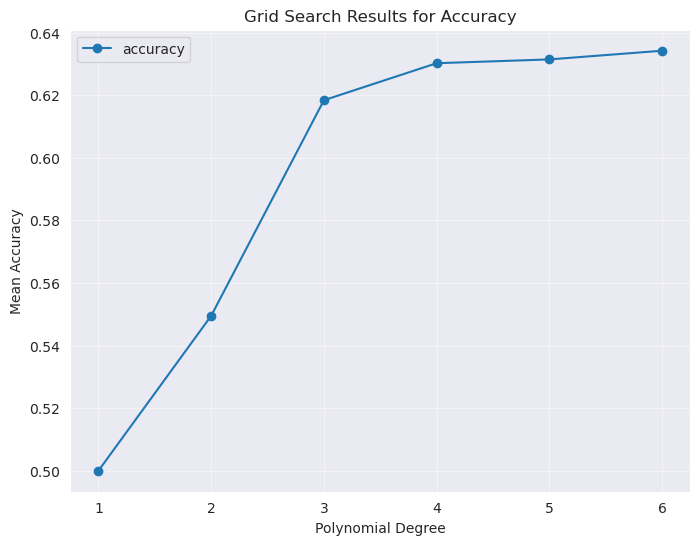

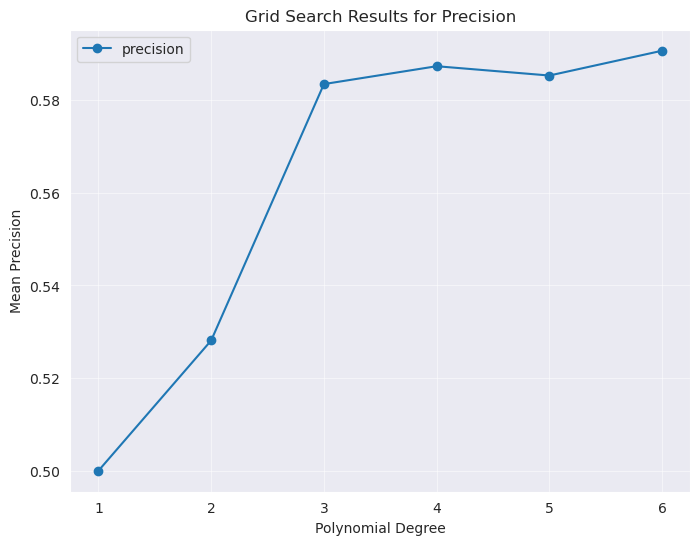

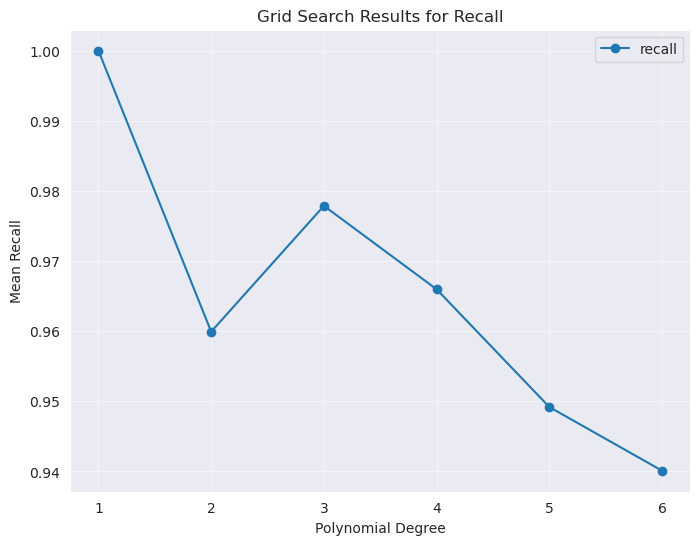

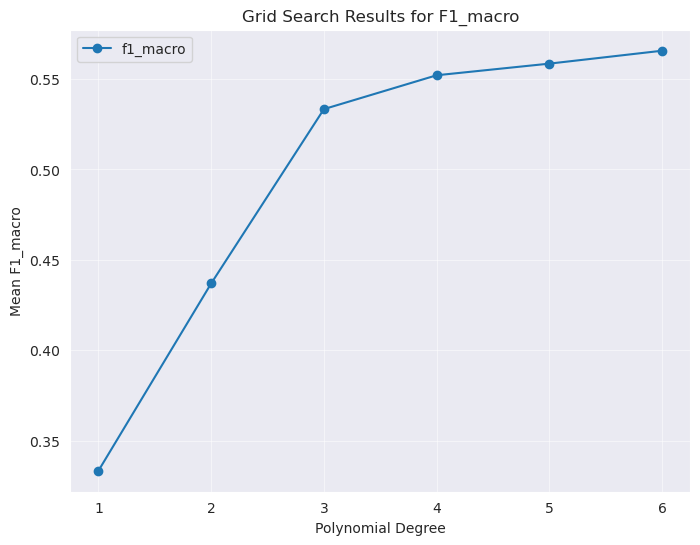

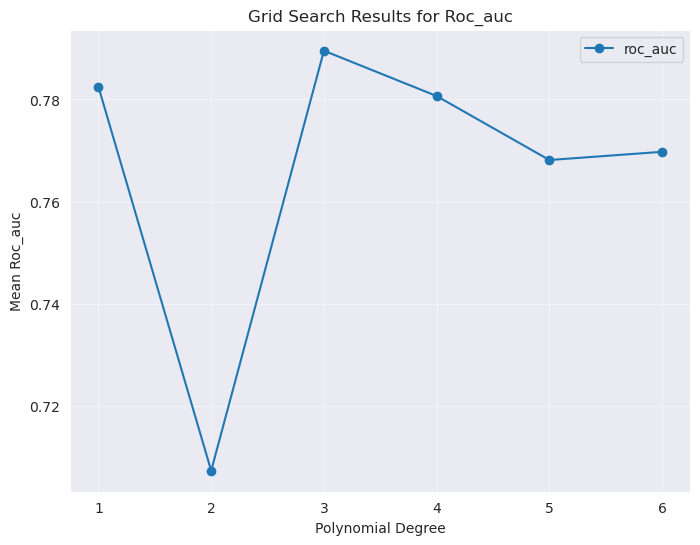

In [7]:
# Define the parameter grid
param_grid = {'degree': [1,2, 3, 4, 5,6], 'C': [1, 10, 100]}  # Adjust C as needed

# Initialize SVM with polynomial kernel
scoring_metrics = {
    'accuracy': 'accuracy',  # Predefined scorer
    'precision': make_scorer(precision_score, pos_label='RiPP'),
    'recall': make_scorer(recall_score, pos_label='RiPP'),
    'f1_macro': 'f1_macro',  # Predefined scorer
    'roc_auc': 'roc_auc'  # Predefined scorer
}
dataset= pd.read_csv('/lustre/BIF/nobackup/sanz006/training_dataset.csv')
labels=dataset[['Class']].to_numpy()
print(labels)
labels_flat=labels.flatten()
label_counts=Counter(labels_flat)
total_samples = len(labels)
unique_tags = len(label_counts)

# Calculate weights inversely proportional to frequencies
tag_weights = {tag: total_samples / (unique_tags * count) for tag, count in label_counts.items()}

sample_weights= np.array([tag_weights[label] for label in labels_flat])
poly_svm = svm.SVC(kernel='poly')

x,y=x_and_y(dataset,complete_features)
my_cv=class_split_iterable(dataset,ripp_classes)
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=poly_svm, param_grid=param_grid, cv=my_cv, scoring=scoring_metrics, verbose=1, n_jobs=30,refit=False)
grid_search.fit(x, y,sample_weight=sample_weights)

# Extract results
results = grid_search.cv_results_
print(results)
degrees = param_grid['degree']
c= param_grid['C']
for metric in scoring_metrics.keys():
    mean_test_scores = []
    for degree in degrees:
        indices = [
            idx for idx, params in enumerate(results['params']) if params['degree'] == degree
        ]
        mean_test_scores.append(np.mean([results[f'mean_test_{metric}'][idx] for idx in indices]))
    
    # Plot for the current metric
    plt.figure(figsize=(8, 6))
    plt.plot(degrees, mean_test_scores, marker='o', linestyle='-', label=metric)
    plt.xlabel('Polynomial Degree')
    plt.ylabel(f'Mean {metric.capitalize()}')
    plt.title(f'Grid Search Results for {metric.capitalize()}')
    plt.xticks(degrees)
    plt.grid(alpha=0.5)
    plt.legend()
    plt.show()


In [3]:
x_train, x_test, y_train, y_test = svm_training_split('/lustre/BIF/nobackup/sanz006/training_dataset.csv',feature_list=complete_features)
dataset= pd.read_csv('/lustre/BIF/nobackup/sanz006/training_dataset.csv')
svc_classification(dataset,x_train, x_test, y_train, y_test,feature_list=complete_features)

[['Bottromycin']
 ['Bottromycin']
 ['Bottromycin']
 ...
 ['No_RiPP']
 ['No_RiPP']
 ['No_RiPP']]


ValueError: sample_weight and X have incompatible shapes: (20501,) vs (16400, 141)
Note: Sparse matrices cannot be indexed w/boolean masks (use `indices=True` in CV).

AUGMENTATION ON DATASET

In [13]:
def svc_classification(x_train, x_test, y_train, y_test,feature_list):
    for i in range(1,8):
            poly_svc = svm.SVC(C=1000,kernel="poly",random_state=0,degree=i,class_weight="balanced")
            poly_svc.fit(x_train, y_train)
            #f_importances(abs(poly_svc.coef_[0]),feature_list)
            y_pred = poly_svc.predict(x_test)
            print(
                pd.DataFrame(
                    confusion_matrix(y_test, y_pred),
                    index=poly_svc.classes_,
                    columns=poly_svc.classes_,
                )
            )
            fig,axes=plt.subplots(1,3,figsize=(15,5))
            RocCurveDisplay.from_estimator(
                poly_svc, x_test, y_test, name="Validation data", ax=axes[0], alpha=0.8
            )
            RocCurveDisplay.from_estimator(poly_svc,x_train,y_train,name='Training data', ax=axes[0],alpha=0.8)
            axes[0].set_title('ROC Curve')
            #plt.show()
            
            PrecisionRecallDisplay.from_estimator(poly_svc,x_test,y_test,name='Validation data',ax=axes[1], alpha=0.8)
            PrecisionRecallDisplay.from_estimator(poly_svc,x_train,y_train,name='Training data',ax=axes[1], alpha=0.8)
            axes[1].set_title('Precision-Recall Curve')
            #plt.show()
            
            ConfusionMatrixDisplay.from_estimator(poly_svc,x_test,y_test,ax=axes[2])
            axes[2].set_title('Confusion matrix')
            
            fig.suptitle(f'SVM with degree {i}')
            plt.tight_layout()
            plt.show()
            # Compute permutation importance
            perm_importance = permutation_importance(poly_svc, x_test, y_test, n_repeats=10, scoring='roc_auc', random_state=42,n_jobs=20)
            # Display feature importance
            for i in perm_importance.importances_mean.argsort()[::-1]:
                print(f"Feature {feature_list[i]}: {perm_importance.importances_mean[i]:.10f} ± {perm_importance.importances_std[i]:.10f}")

         No_RiPP  RiPP
No_RiPP     3608   392
RiPP         206  2127


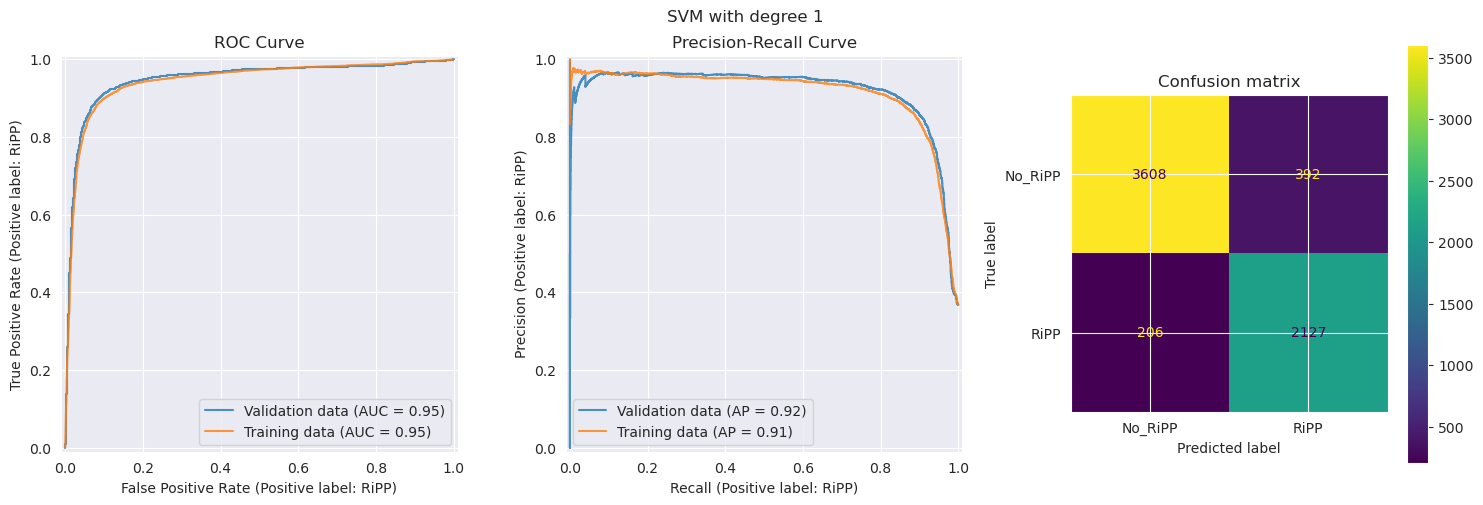

Feature boman: 0.1767059687 ± 0.0030171088
Feature length: 0.0458828654 ± 0.0014759197
Feature aliphatic: 0.0411900879 ± 0.0016242885
Feature PRIN1: 0.0402706494 ± 0.0018627928
Feature SVGER10: 0.0345081119 ± 0.0015360190
Feature SVGER3: 0.0138357158 ± 0.0005412898
Feature PRIN2: 0.0066183883 ± 0.0005022312
Feature ProtFP1: 0.0054943313 ± 0.0007056078
Feature ProtFP7: 0.0043958101 ± 0.0004037390
Feature ProtFP3: 0.0043675418 ± 0.0004938469
Feature SVGER4: 0.0038568153 ± 0.0004782876
Feature ProtFP2: 0.0038000321 ± 0.0003397802
Feature F5: 0.0025667488 ± 0.0003238487
Feature entropyratio: 0.0024673703 ± 0.0002429407
Feature SVGER11: 0.0018935062 ± 0.0003202754
Feature VHSE8: 0.0018086905 ± 0.0002525347
Feature SVGER5: 0.0017940956 ± 0.0003877295
Feature Z4: 0.0017712923 ± 0.0003707845
Feature KF6: 0.0015359516 ± 0.0002089486
Feature cys20: 0.0014811402 ± 0.0002154252
Feature ProtFP6: 0.0014312366 ± 0.0001429915
Feature charge: 0.0012418881 ± 0.0003846514
Feature cys_ser20: 0.0012260716 

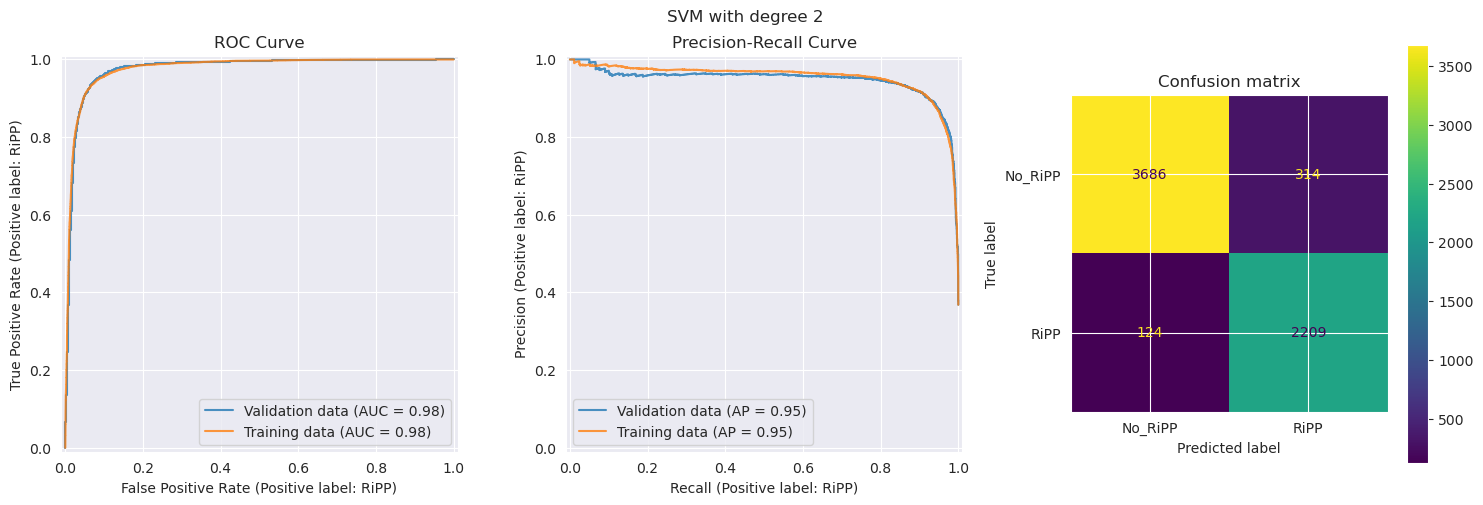

Feature length: 0.1138206279 ± 0.0028231181
Feature boman: 0.0888616695 ± 0.0016561972
Feature aliphatic: 0.0439892842 ± 0.0015147986
Feature SVGER10: 0.0220847728 ± 0.0010580806
Feature PRIN1: 0.0205672739 ± 0.0011357577
Feature charge: 0.0142349121 ± 0.0011722280
Feature instability: 0.0125171667 ± 0.0010277761
Feature SVGER3: 0.0053114874 ± 0.0004767093
Feature ProtFP3: 0.0036657308 ± 0.0005635416
Feature ProtFP1: 0.0032278826 ± 0.0003504318
Feature Z4: 0.0030350086 ± 0.0004389617
Feature PRIN2: 0.0025573189 ± 0.0002435980
Feature ProtFP7: 0.0025292220 ± 0.0002822245
Feature SVGER7: 0.0022728140 ± 0.0002683611
Feature T1: 0.0022706065 ± 0.0002649438
Feature entropyratio: 0.0020433562 ± 0.0001826877
Feature SVGER11: 0.0019682919 ± 0.0005167783
Feature SVGER4: 0.0018692027 ± 0.0002776721
Feature cys_ser20: 0.0014729533 ± 0.0001700432
Feature ProtFP4: 0.0014083262 ± 0.0003692699
Feature ProtFP2: 0.0013778183 ± 0.0001965707
Feature Z3: 0.0013617660 ± 0.0001777008
Feature T2: 0.001272213

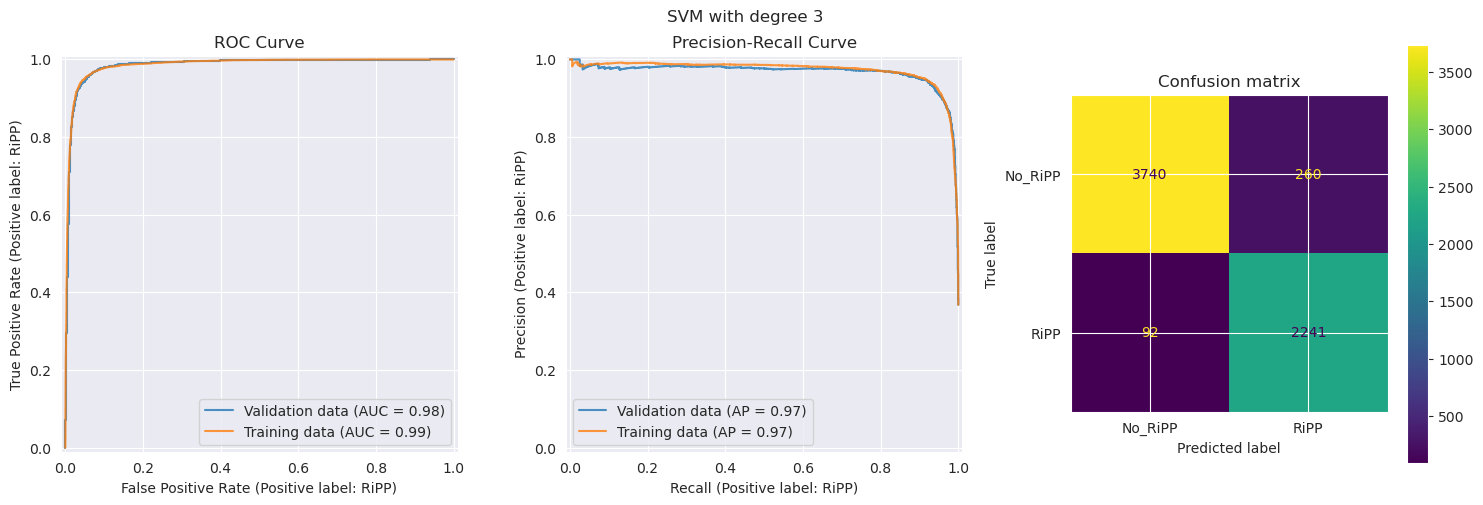

Feature length: 0.1494906558 ± 0.0029501784
Feature boman: 0.0440692242 ± 0.0010909820
Feature aliphatic: 0.0394209066 ± 0.0012702711
Feature instability: 0.0179096442 ± 0.0013029250
Feature SVGER10: 0.0159482533 ± 0.0010587336
Feature charge: 0.0131379233 ± 0.0009547001
Feature PRIN1: 0.0059917167 ± 0.0005039919
Feature T1: 0.0053662023 ± 0.0007373684
Feature SVGER7: 0.0027809151 ± 0.0003849378
Feature SVGER3: 0.0026577047 ± 0.0003677297
Feature PRIN2: 0.0016096121 ± 0.0003027592
Feature SVGER4: 0.0014754286 ± 0.0002040248
Feature ProtFP7: 0.0014444814 ± 0.0002544183
Feature Z4: 0.0012573725 ± 0.0002964493
Feature ProtFP1: 0.0011918667 ± 0.0002539549
Feature T2: 0.0010880304 ± 0.0002559443
Feature ProtFP3: 0.0010213030 ± 0.0003249025
Feature SVGER5: 0.0010169846 ± 0.0002244066
Feature SVGER11: 0.0010151307 ± 0.0003292127
Feature Z3: 0.0009026468 ± 0.0002554418
Feature PRIN3: 0.0008798971 ± 0.0001561092
Feature ProtFP4: 0.0007844192 ± 0.0001550137
Feature SVGER8: 0.0007616159 ± 0.00016

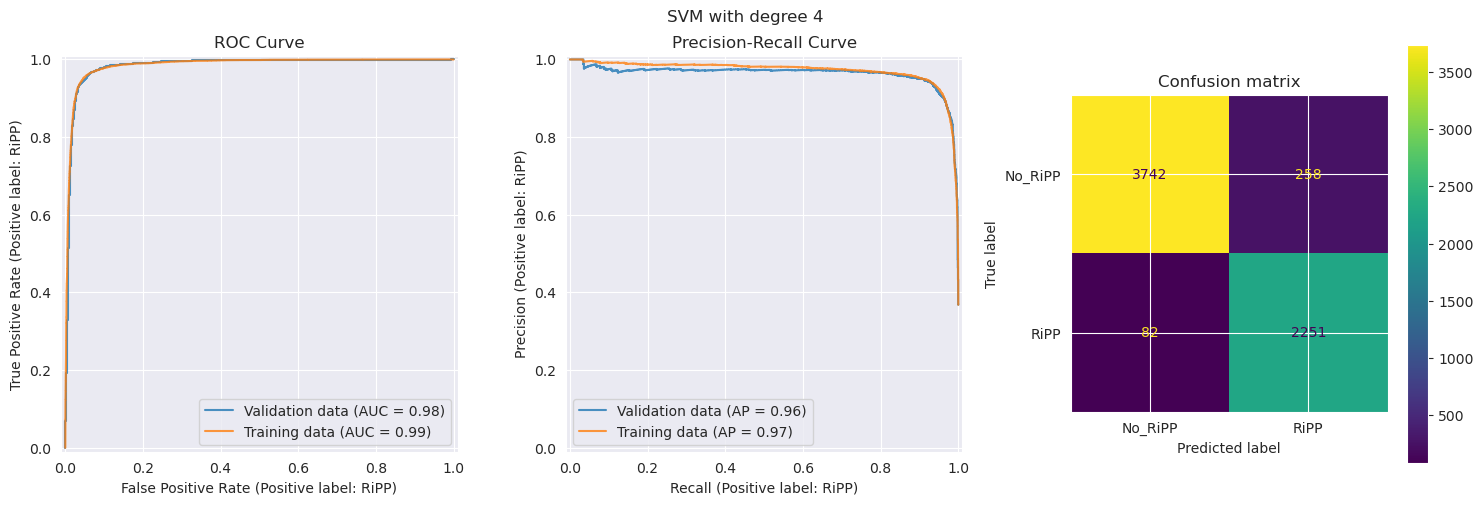

Feature length: 0.1834936670 ± 0.0042366708
Feature boman: 0.0347874303 ± 0.0012874522
Feature aliphatic: 0.0266809044 ± 0.0009694291
Feature instability: 0.0181185062 ± 0.0015693039
Feature SVGER10: 0.0177737570 ± 0.0009461537
Feature charge: 0.0157203601 ± 0.0010306423
Feature T1: 0.0096379769 ± 0.0011682497
Feature PRIN1: 0.0063477390 ± 0.0005896130
Feature SVGER7: 0.0045330476 ± 0.0003894672
Feature PRIN2: 0.0032675418 ± 0.0003426154
Feature SVGER3: 0.0022969996 ± 0.0004285195
Feature Z4: 0.0020804651 ± 0.0004755325
Feature ProtFP1: 0.0017753536 ± 0.0004129783
Feature ProtFP7: 0.0016895735 ± 0.0003862773
Feature ProtFP4: 0.0016418345 ± 0.0002051295
Feature ProtFP3: 0.0015949850 ± 0.0002994077
Feature Z3: 0.0013123232 ± 0.0003313749
Feature ProtFP2: 0.0012960244 ± 0.0003471050
Feature T2: 0.0012770039 ± 0.0004163663
Feature F1: 0.0012346228 ± 0.0001935344
Feature AF5: 0.0011628804 ± 0.0002363877
Feature PRIN3: 0.0011438598 ± 0.0001909628
Feature SVGER11: 0.0009841192 ± 0.0002942220


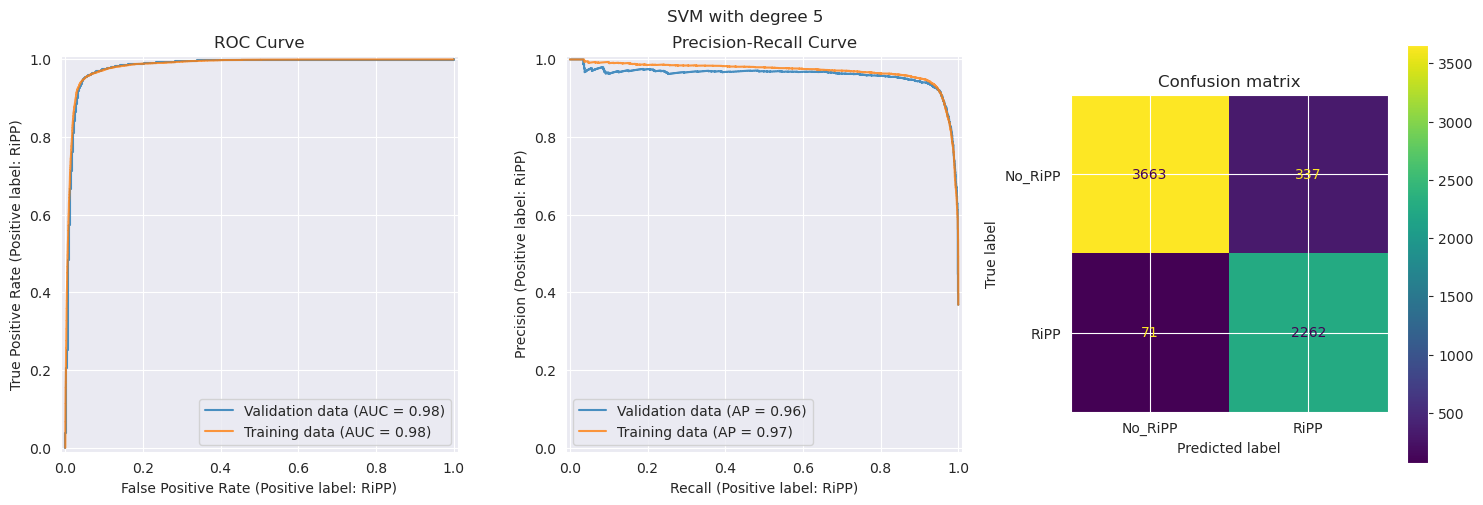

Feature length: 0.1941597085 ± 0.0044954269
Feature boman: 0.0335809901 ± 0.0017156564
Feature instability: 0.0244539113 ± 0.0016610345
Feature aliphatic: 0.0232478354 ± 0.0009236939
Feature charge: 0.0177307544 ± 0.0008674533
Feature SVGER10: 0.0169779683 ± 0.0009108301
Feature T1: 0.0083102550 ± 0.0013616836
Feature PRIN2: 0.0053185598 ± 0.0006688372
Feature PRIN1: 0.0053043078 ± 0.0003533326
Feature SVGER7: 0.0032541685 ± 0.0003698403
Feature Z4: 0.0019443742 ± 0.0004567332
Feature ProtFP3: 0.0018185919 ± 0.0004481946
Feature SVGER3: 0.0017852229 ± 0.0004710041
Feature ProtFP1: 0.0015928633 ± 0.0002999833
Feature Z3: 0.0015246464 ± 0.0005033012
Feature ProtFP4: 0.0015241535 ± 0.0002289822
Feature PRIN3: 0.0013078333 ± 0.0002682373
Feature T2: 0.0012200493 ± 0.0004548487
Feature AF5: 0.0012199421 ± 0.0003538775
Feature ProtFP7: 0.0011459709 ± 0.0003288781
Feature F1: 0.0010965817 ± 0.0003272085
Feature SVGER4: 0.0009904201 ± 0.0001298598
Feature Z1: 0.0009535255 ± 0.0002017141
Featur

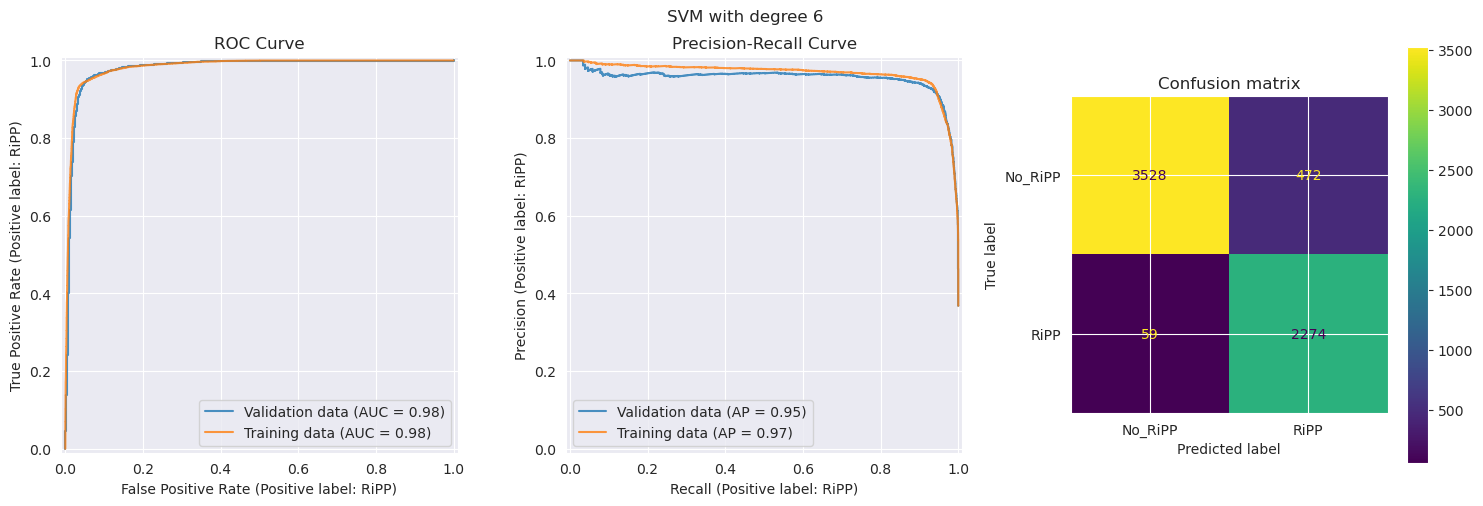

KeyboardInterrupt: 

In [14]:
x_train, x_test, y_train, y_test = svm_training_split('/lustre/BIF/nobackup/sanz006/positive_training/augmented_training_dataset_v3.csv',feature_list=complete_features)
svc_classification(x_train, x_test, y_train, y_test,feature_list=complete_features)

In [8]:
# Define the parameter grid
param_grid = {'degree': [1,2,3,4,5,6], 'C': [ 1, 10,100]}  # Adjust C as needed

# Initialize SVM with polynomial kernel
scoring_metrics = {
    'accuracy': 'accuracy',  # Predefined scorer
    'precision': make_scorer(precision_score, pos_label='RiPP'),
    'recall': make_scorer(recall_score, pos_label='RiPP'),
    'f1_macro': 'f1_macro',  # Predefined scorer
    'roc_auc': 'roc_auc'  # Predefined scorer
}
poly_svm = svm.SVC(kernel='poly',class_weight="balanced")
dataset= pd.read_csv('/lustre/BIF/nobackup/sanz006/positive_training/augmented_training_dataset_v3.csv')
x,y=x_and_y(dataset,complete_features)
my_cv=class_split_iterable(dataset,ripp_classes)
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=poly_svm, param_grid=param_grid, cv=my_cv, scoring=scoring_metrics, verbose=3, n_jobs=30,refit=False,error_score='raise')
grid_search.fit(x, y)

# Extract results
results = grid_search.cv_results_
print(results)
degrees = param_grid['degree']
c= param_grid['C']
for metric in scoring_metrics.keys():
    mean_test_scores = []
    for degree in degrees:
        indices = [
            idx for idx, params in enumerate(results['params']) if params['C'] == cs
        ]
        mean_test_scores.append(np.mean([results[f'mean_test_{metric}'][idx] for idx in indices]))
    
    # Plot for the current metric
    plt.figure(figsize=(8, 6))
    plt.plot(degrees, mean_test_scores, marker='o', linestyle='-', label=metric)
    plt.xlabel('Polynomial degree')
    plt.ylabel(f'Mean {metric.capitalize()}')
    plt.title(f'Grid Search Results for {metric.capitalize()}')
    plt.xticks(degrees)
    plt.grid(alpha=0.5)
    plt.legend()
    plt.show()


Fitting 39 folds for each of 18 candidates, totalling 702 fits


/lustre/BIF/nobackup/sanz006/miniforge3/envs/ripp/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lustre/BIF/nobackup/sanz006/miniforge3/envs/ripp/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lustre/BIF/nobackup/sanz006/miniforge3/envs/ripp/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

{'mean_fit_time': array([105.75549571,  98.42975214,  84.19281101,  88.33305287,
        91.0930155 ,  95.9328968 ,  97.08762851,  80.33674998,
        67.66758162,  71.69574194,  76.52919555,  80.97503084,
        94.77068845,  71.56013509,  58.61143973,  64.17837494,
        72.03200474,  80.28462811]), 'std_fit_time': array([ 9.1403978 ,  9.07550667,  7.10616842,  7.47146792,  7.90196811,
        8.32600689,  8.39512404,  6.74903336,  5.88609824,  6.12839425,
        6.96480999,  7.6233682 ,  7.4070723 ,  6.30540065,  5.31574074,
        5.75989199,  7.83349551, 12.58938239]), 'mean_score_time': array([2.26744821, 1.86108561, 1.4645127 , 1.57775738, 1.67931252,
       1.75480143, 1.76808913, 1.16738985, 0.86861603, 0.95246974,
       1.0192784 , 1.12879957, 1.07957213, 0.59771501, 0.4908799 ,
       0.51841989, 0.58983883, 0.58186659]), 'std_score_time': array([5.09676642, 4.10529715, 2.89386715, 3.32862928, 3.60025524,
       3.85645984, 4.10252119, 2.39490584, 1.72500151, 1.927622

NameError: name 'cs' is not defined

BALANCING AUGMENTED DATA THROUGH CLASSES

[['Bottromycin']
 ['Bottromycin']
 ['Bottromycin']
 ...
 ['No_RiPP']
 ['No_RiPP']
 ['No_RiPP']]
Fitting 39 folds for each of 18 candidates, totalling 702 fits
{'mean_fit_time': array([132.04743295, 132.14314894, 124.84307578, 115.32289727,
       113.20839164, 149.60743896, 214.41431837, 199.81556518,
       172.30773187, 165.92076333, 172.37809893, 174.83145209,
       216.99496935, 192.41565423, 153.60672196, 149.73117515,
       150.25931555, 123.22241095]), 'std_fit_time': array([12.37112546, 12.00737469, 10.84597535, 10.00014882,  9.77135324,
       45.55025712, 60.55040457, 53.12171429, 48.12466712, 39.32583125,
       49.37950038, 47.39338291, 63.62130259, 56.97182567, 40.30281926,
       42.68440658, 42.35426874, 23.23901764]), 'mean_score_time': array([2.9035982 , 2.97069336, 2.74764894, 2.51123697, 2.47652523,
       3.70661268, 4.78497708, 4.40106193, 3.82535512, 3.41015092,
       3.37516003, 3.69307119, 4.35168983, 3.77249871, 3.6860508 ,
       2.83839415, 2.58252379, 1.5

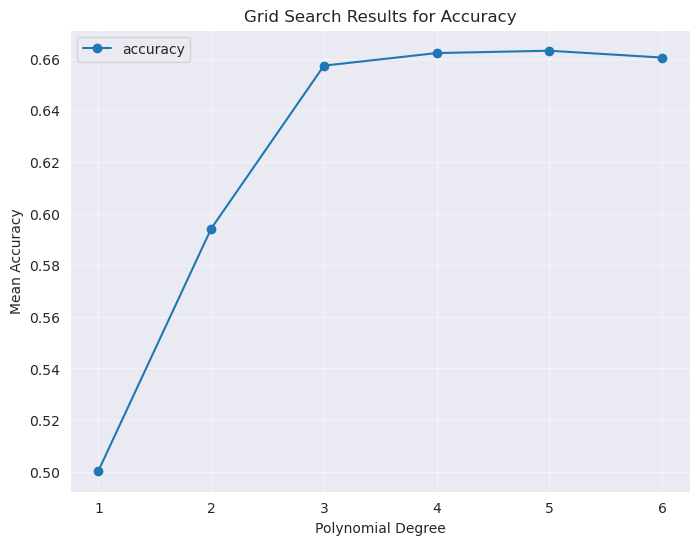

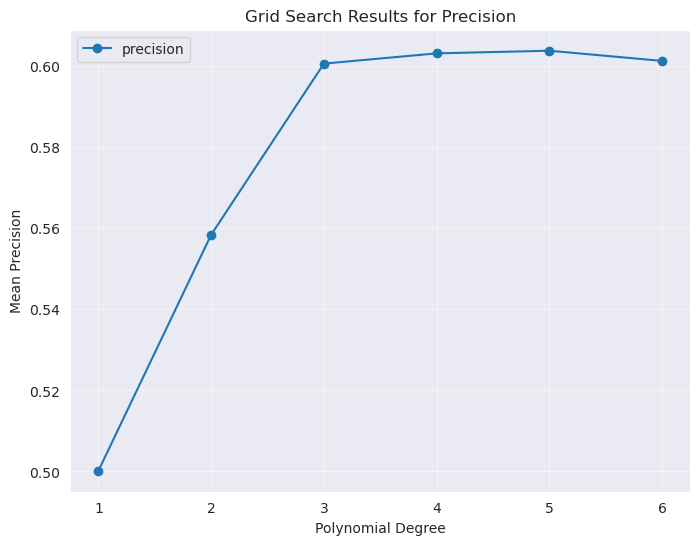

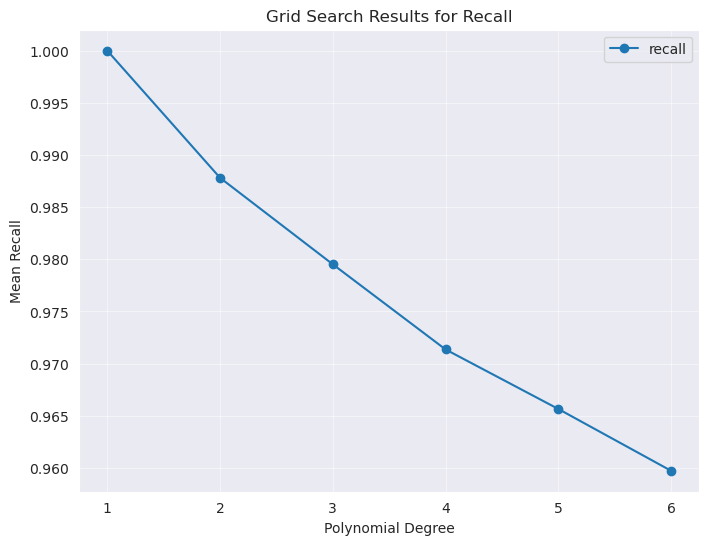

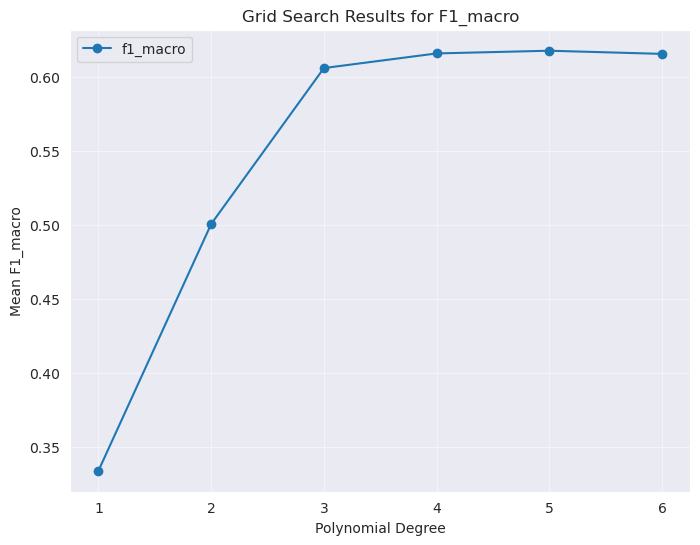

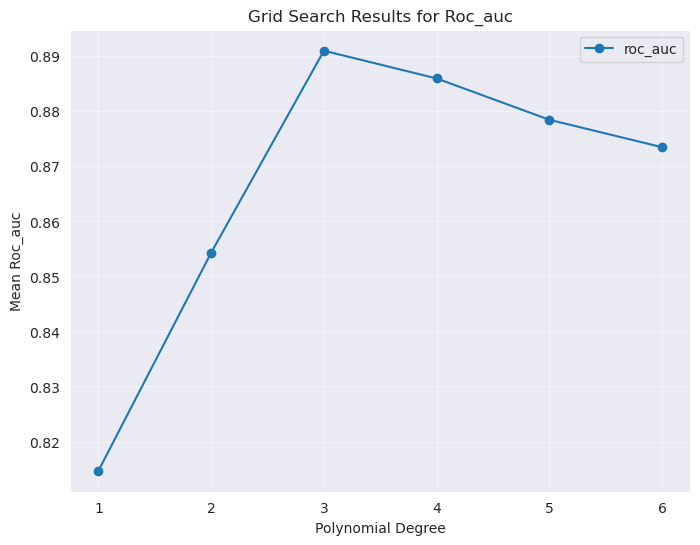

In [9]:
# Define the parameter grid
param_grid = {'degree': [1,2, 3, 4, 5,6], 'C': [ 1, 10,100]}  # Adjust C as needed

# Initialize SVM with polynomial kernel
scoring_metrics = {
    'accuracy': 'accuracy',  # Predefined scorer
    'precision': make_scorer(precision_score, pos_label='RiPP'),
    'recall': make_scorer(recall_score, pos_label='RiPP'),
    'f1_macro': 'f1_macro',  # Predefined scorer
    'roc_auc': 'roc_auc'  # Predefined scorer
}
dataset= pd.read_csv('/lustre/BIF/nobackup/sanz006/positive_training/augmented_training_dataset_v3.csv')
labels=dataset[['Class']].to_numpy()
print(labels)
labels_flat=labels.flatten()
label_counts=Counter(labels_flat)
total_samples = len(labels)
unique_tags = len(label_counts)

# Calculate weights inversely proportional to frequencies
tag_weights = {tag: total_samples / (unique_tags * count) for tag, count in label_counts.items()}

sample_weights= np.array([tag_weights[label] for label in labels_flat])
poly_svm = svm.SVC(kernel='poly')

x,y=x_and_y(dataset,complete_features)
my_cv=class_split_iterable(dataset,ripp_classes)
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=poly_svm, param_grid=param_grid, cv=my_cv, scoring=scoring_metrics, verbose=1, n_jobs=30,refit=False,error_score='raise')
grid_search.fit(x, y,sample_weight=sample_weights)

# Extract results
results = grid_search.cv_results_
print(results)
degrees = param_grid['degree']
c= param_grid['C']
for metric in scoring_metrics.keys():
    mean_test_scores = []
    for degree in degrees:
        indices = [
            idx for idx, params in enumerate(results['params']) if params['degree'] == degree
        ]
        mean_test_scores.append(np.mean([results[f'mean_test_{metric}'][idx] for idx in indices]))
    
    # Plot for the current metric
    plt.figure(figsize=(8, 6))
    plt.plot(degrees, mean_test_scores, marker='o', linestyle='-', label=metric)
    plt.xlabel('Polynomial Degree')
    plt.ylabel(f'Mean {metric.capitalize()}')
    plt.title(f'Grid Search Results for {metric.capitalize()}')
    plt.xticks(degrees)
    plt.grid(alpha=0.5)
    plt.legend()
    plt.show()


REMOVING SOME LANTHIPEPTIDES FOR BALANCE

In [11]:
dataset= pd.read_csv('/lustre/BIF/nobackup/sanz006/positive_training/augmented_training_dataset_v3.csv')
print(dataset.loc[dataset['Class']=='Lanthipeptide'].index)
#print(dataset[dataset.Class=='Lanthipeptide'])

Index([  447,   448,   449,   450,   451,   452,   453,   454,   455,   456,
       ...
       11188, 11189, 11190, 11191, 11192, 11193, 11194, 11195, 11196, 11197],
      dtype='int64', length=4985)


REMOVED LANTHIPEPTIDES, BALANCED THROUGH CLASSES

       index       protein_id  \
0          0       CCM09443.1   
1          1   WP_272169004.1   
2          2   WP_318812149.1   
3          3   WP_009298735.1   
4          4   WP_215451530.1   
...      ...              ...   
27812  31660  UniRef90_Q2JHE4   
27813  31661  UniRef90_A6LKD2   
27814  31662  UniRef90_P73441   
27815  31663  UniRef90_A1B840   
27816  31664  UniRef90_B4RDI3   

                                                sequence     RiPP  \
0           MGPVVVFDCMTADFLNDDPNNAELSALEMEELESWGAWDGEATS     RiPP   
1           MGPVVVFDCMTADFLNDDPNNAELSALEMEELESWGAWDGDATS     RiPP   
2           MGPVVVFDCMTADFLNDDPNNAELSALEMEELESWGAWDGEVTS     RiPP   
3           MGPVVVFDCMTADFLNDDPNNAELSALEMEELESWGDWDGDVTS     RiPP   
4         MGPAVVFDCMTADFLNDDPNNAELSALEMAELESWGAWSEDGESVQ     RiPP   
...                                                  ...      ...   
27812  MAIKRGTLVRAIREKLEGSLEAQASDPFIPNYVFETPGEVVDIKGD...  No_RiPP   
27813  MKAIYPGSFDPITYGHLDIIKRATKIFSEVYVVVMENKRKNYTF

/lustre/BIF/nobackup/sanz006/miniforge3/envs/ripp/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


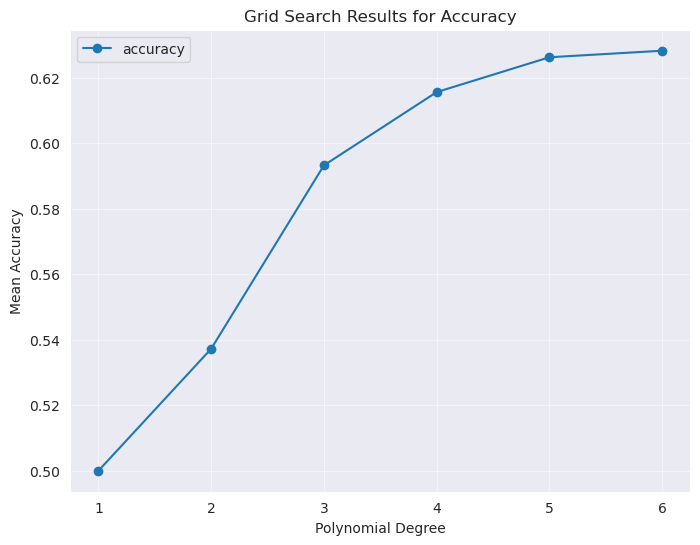

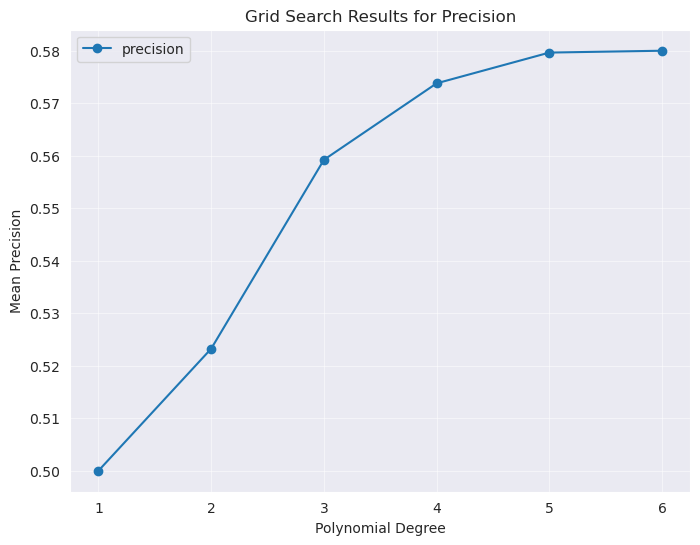

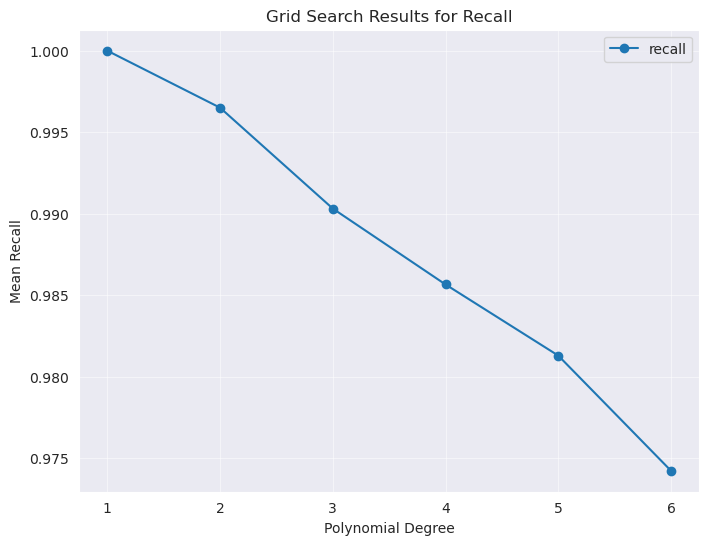

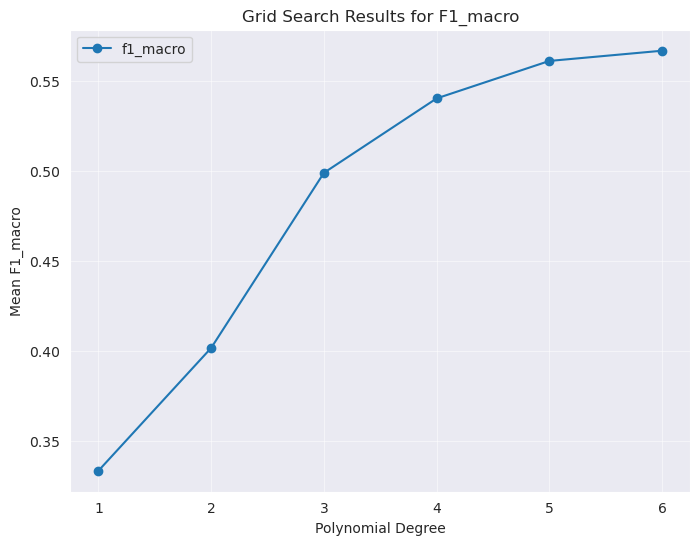

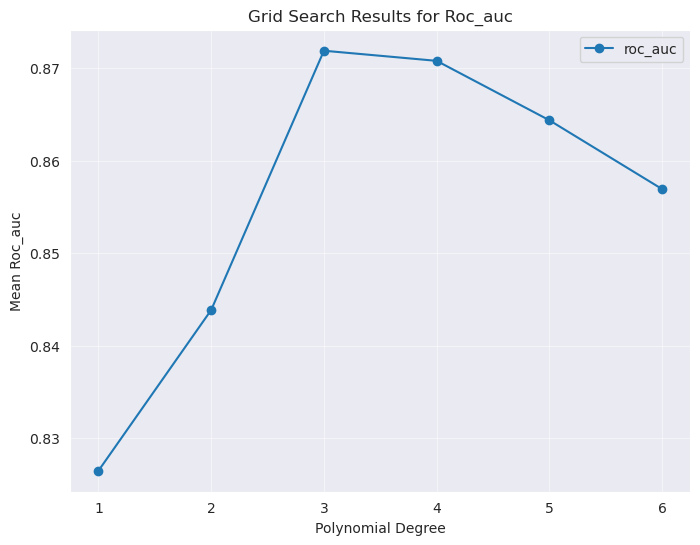

In [14]:
remove_n=3848
dataset= pd.read_csv('/lustre/BIF/nobackup/sanz006/positive_training/augmented_training_dataset_v3.csv')
lanth_indices=dataset.loc[dataset['Class']=='Lanthipeptide'].index
drop_indices=np.random.choice(lanth_indices,remove_n,replace=False)
dataset=dataset.drop(index=drop_indices)
dataset=dataset.reset_index()
print(dataset)
# Define the parameter grid
param_grid = {'degree': [1,2, 3, 4, 5,6], 'C': [0.1, 1, 10]}  # Adjust C as needed

# Initialize SVM with polynomial kernel
scoring_metrics = {
    'accuracy': 'accuracy',  # Predefined scorer
    'precision': make_scorer(precision_score, pos_label='RiPP'),
    'recall': make_scorer(recall_score, pos_label='RiPP'),
    'f1_macro': 'f1_macro',  # Predefined scorer
    'roc_auc': 'roc_auc'  # Predefined scorer
}

labels=dataset[['Class']].to_numpy()
print(labels)
labels_flat=labels.flatten()
label_counts=Counter(labels_flat)
total_samples = len(labels)
unique_tags = len(label_counts)

# Calculate weights inversely proportional to frequencies
tag_weights = {tag: total_samples / (unique_tags * count) for tag, count in label_counts.items()}

sample_weights= np.array([tag_weights[label] for label in labels_flat])
poly_svm = svm.SVC(kernel='poly')

x,y=x_and_y(dataset,complete_features)
my_cv=class_split_iterable(dataset,ripp_classes)
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=poly_svm, param_grid=param_grid, cv=my_cv, scoring=scoring_metrics, verbose=1, n_jobs=30,refit=False,error_score='raise')
grid_search.fit(x, y,sample_weight=sample_weights)

# Extract results
results = grid_search.cv_results_
degrees = param_grid['degree']
c= param_grid['C']
for metric in scoring_metrics.keys():
    mean_test_scores = []
    for degree in degrees:
        indices = [
            idx for idx, params in enumerate(results['params']) if params['degree'] == degree
        ]
        mean_test_scores.append(np.mean([results[f'mean_test_{metric}'][idx] for idx in indices]))
    
    # Plot for the current metric
    plt.figure(figsize=(8, 6))
    plt.plot(degrees, mean_test_scores, marker='o', linestyle='-', label=metric)
    plt.xlabel('Polynomial Degree')
    plt.ylabel(f'Mean {metric.capitalize()}')
    plt.title(f'Grid Search Results for {metric.capitalize()}')
    plt.xticks(degrees)
    plt.grid(alpha=0.5)
    plt.legend()
    plt.show()

TRIMMED LANTHIPEPTIDES, NOT BALANCED THROUGH CLASSES

Fitting 39 folds for each of 18 candidates, totalling 702 fits


/lustre/BIF/nobackup/sanz006/miniforge3/envs/ripp/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lustre/BIF/nobackup/sanz006/miniforge3/envs/ripp/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lustre/BIF/nobackup/sanz006/miniforge3/envs/ripp/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

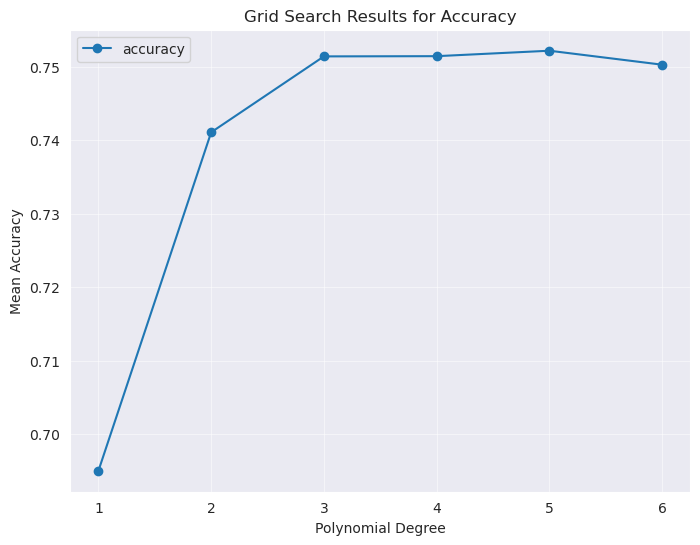

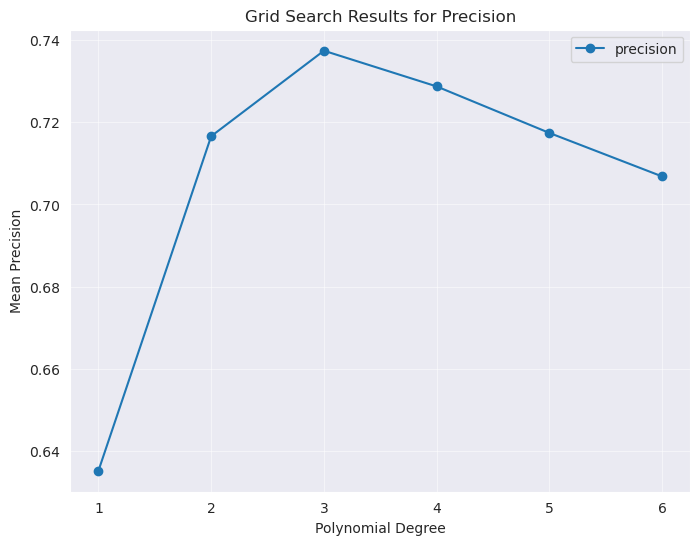

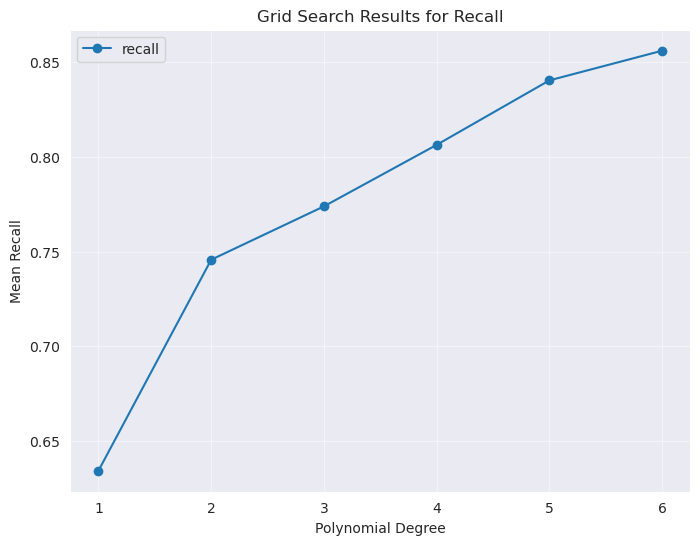

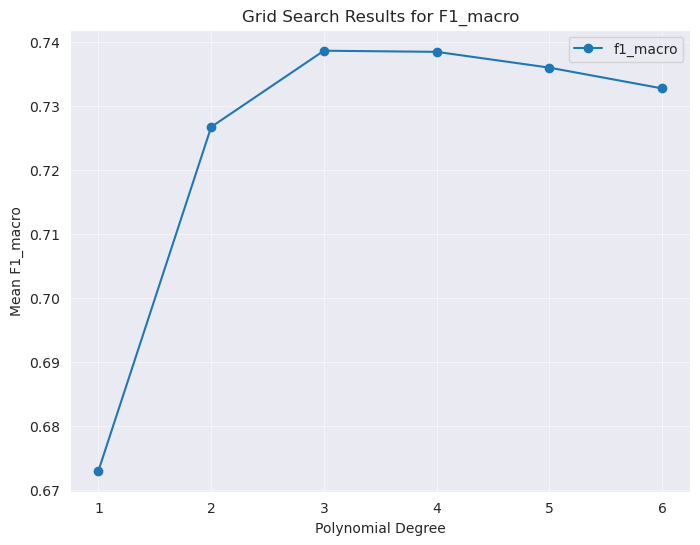

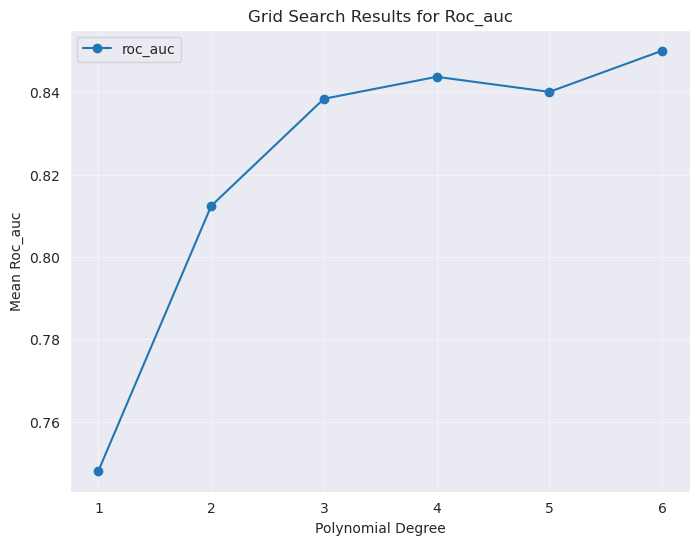

In [16]:
remove_n=3848
dataset= pd.read_csv('/lustre/BIF/nobackup/sanz006/positive_training/augmented_training_dataset_v3.csv')
lanth_indices=dataset.loc[dataset['Class']=='Lanthipeptide'].index
drop_indices=np.random.choice(lanth_indices,remove_n,replace=False)
dataset=dataset.drop(index=drop_indices)
dataset=dataset.reset_index()

param_grid = {'degree': [1,2, 3, 4, 5,6], 'C': [0.1, 1, 10,100,1000]}  # Adjust C as needed

# Initialize SVM with polynomial kernel
scoring_metrics = {
    'accuracy': 'accuracy',  # Predefined scorer
    'precision': make_scorer(precision_score, pos_label='RiPP'),
    'recall': make_scorer(recall_score, pos_label='RiPP'),
    'f1_macro': 'f1_macro',  # Predefined scorer
    'roc_auc': 'roc_auc'  # Predefined scorer
}
poly_svm = svm.SVC(kernel='poly',class_weight="balanced")
x,y=x_and_y(dataset,complete_features)
my_cv=class_split_iterable(dataset,ripp_classes)
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=poly_svm, param_grid=param_grid, cv=my_cv, scoring=scoring_metrics, verbose=1, n_jobs=30,refit=False)
grid_search.fit(x, y)

# Extract results
results = grid_search.cv_results_
degrees = param_grid['degree']
c= param_grid['C']
for metric in scoring_metrics.keys():
    mean_test_scores = []
    for degree in degrees:
        indices = [
            idx for idx, params in enumerate(results['params']) if params['degree'] == degree
        ]
        mean_test_scores.append(np.mean([results[f'mean_test_{metric}'][idx] for idx in indices]))
    
    # Plot for the current metric
    plt.figure(figsize=(8, 6))
    plt.plot(degrees, mean_test_scores, marker='o', linestyle='-', label=metric)
    plt.xlabel('Polynomial Degree')
    plt.ylabel(f'Mean {metric.capitalize()}')
    plt.title(f'Grid Search Results for {metric.capitalize()}')
    plt.xticks(degrees)
    plt.grid(alpha=0.5)
    plt.legend()
    plt.show()


USING VALIDATED DATA AS VALIDATION SET AND PREDICTIONS AS TRAINING

In [4]:
dataset = pd.read_csv('/lustre/BIF/nobackup/sanz006/positive_training/augmented_training_dataset_v3.csv')

test=dataset.loc[(dataset['RiPP']=='RiPP')&(dataset['validation']=='yes')]
train1=dataset.loc[(dataset['RiPP']=='No_RiPP')]
train2=dataset.loc[(dataset['RiPP']=='RiPP')&(dataset['validation']=='no')]
train=pd.concat([train1,train2])
x_train=train[complete_features]
x_test=test[complete_features]
y_train=train[["RiPP"]].to_numpy().ravel()
y_test=test[["RiPP"]].to_numpy().ravel()
print(x_test)


            AF1       AF2       AF3       AF4       AF5   BLOSUM1   BLOSUM2  \
0     -0.065198 -0.166263 -0.341687  0.323579 -0.560541  0.213182 -0.218182   
13    -0.065198 -0.166263 -0.341687  0.323579 -0.560541  0.213182 -0.218182   
14    -0.014687 -0.064995 -0.803128  0.257150 -0.856011  0.279130 -0.210000   
27    -0.220102  0.113339 -0.760078  0.461212 -0.511163  0.108667 -0.414533   
88     0.153651  0.064036 -0.592679  0.357647 -0.410944  0.432653 -0.282449   
...         ...       ...       ...       ...       ...       ...       ...   
11499 -0.166306 -0.030130 -0.855482  0.434218 -0.707201  0.122188 -0.380625   
11505  0.252471 -0.180842  0.104240  0.187703  0.090424  0.250000 -0.053265   
11586  0.091244  0.052603 -0.189399  0.250611 -0.099667  0.229982 -0.089908   
11657  0.034137 -0.173477  0.352149  0.257344  0.018880  0.100000 -0.292143   
11664  0.106494 -0.010852 -0.124371  0.291495  0.146365  0.120000 -0.230270   

        BLOSUM3   BLOSUM4   BLOSUM5  ...         T 

In [5]:
poly_svc = svm.SVC(C=10,kernel="poly",random_state=0,degree=3,class_weight="balanced")
poly_svc.fit(x_train, y_train)
#f_importances(abs(poly_svc.coef_[0]),feature_list)
y_pred = poly_svc.predict(x_test)
print(y_pred)
print(len(y_pred))
print(len(y_test))
print(x_test.index.values.tolist())
print(len(x_test.index.values.tolist()))
test_indices=x_test.index.values.tolist()

['RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP'
 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP'
 'RiPP' 'No_RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP'
 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP'
 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP'
 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'No_RiPP' 'RiPP'
 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP'
 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP'
 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP'
 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP'
 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP'
 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP'
 'RiPP' 'RiPP' 'No_RiPP' 'No_RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'No_RiPP'
 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP' 'RiPP

In [6]:
fn_classes=[]
tp_classes=[]
for i in range(len(y_pred)):
    if y_pred[i]=='No_RiPP':
        fn_classes.append(dataset['Class'].iloc[test_indices[i]])
    else:
        tp_classes.append(dataset['Class'].iloc[test_indices[i]])
print(fn_classes)

['Head-to-tail cyclized peptide', 'Lanthipeptide', 'Lasso', 'Lasso', 'Lasso', 'N-Formylated TBA', 'N-Formylated TBA', 'Proteusin', 'Proteusin', 'TBA', 'Dikaritin', 'Linear azole-containing peptide', 'Dikaritin', 'Lasso', 'Lasso', 'Lasso', 'Crocagin', 'Lasso', 'Linear azole-containing peptide', 'Proteusin', 'Lasso', 'Thioamitide', 'Thioamitide', 'Streptide', 'Methanobactin', 'Sulfatyrotide', 'Cyptide', 'Methanobactin', 'Methanobactin', 'Pantocin', 'AIP', 'Cyptide', 'Cyptide', 'Cyptide', 'Glycocin', 'other', 'other', 'other', 'Cyptide', 'Lasso', 'Cyptide', 'Cyptide', 'Cyclotide', 'Rotapeptide']


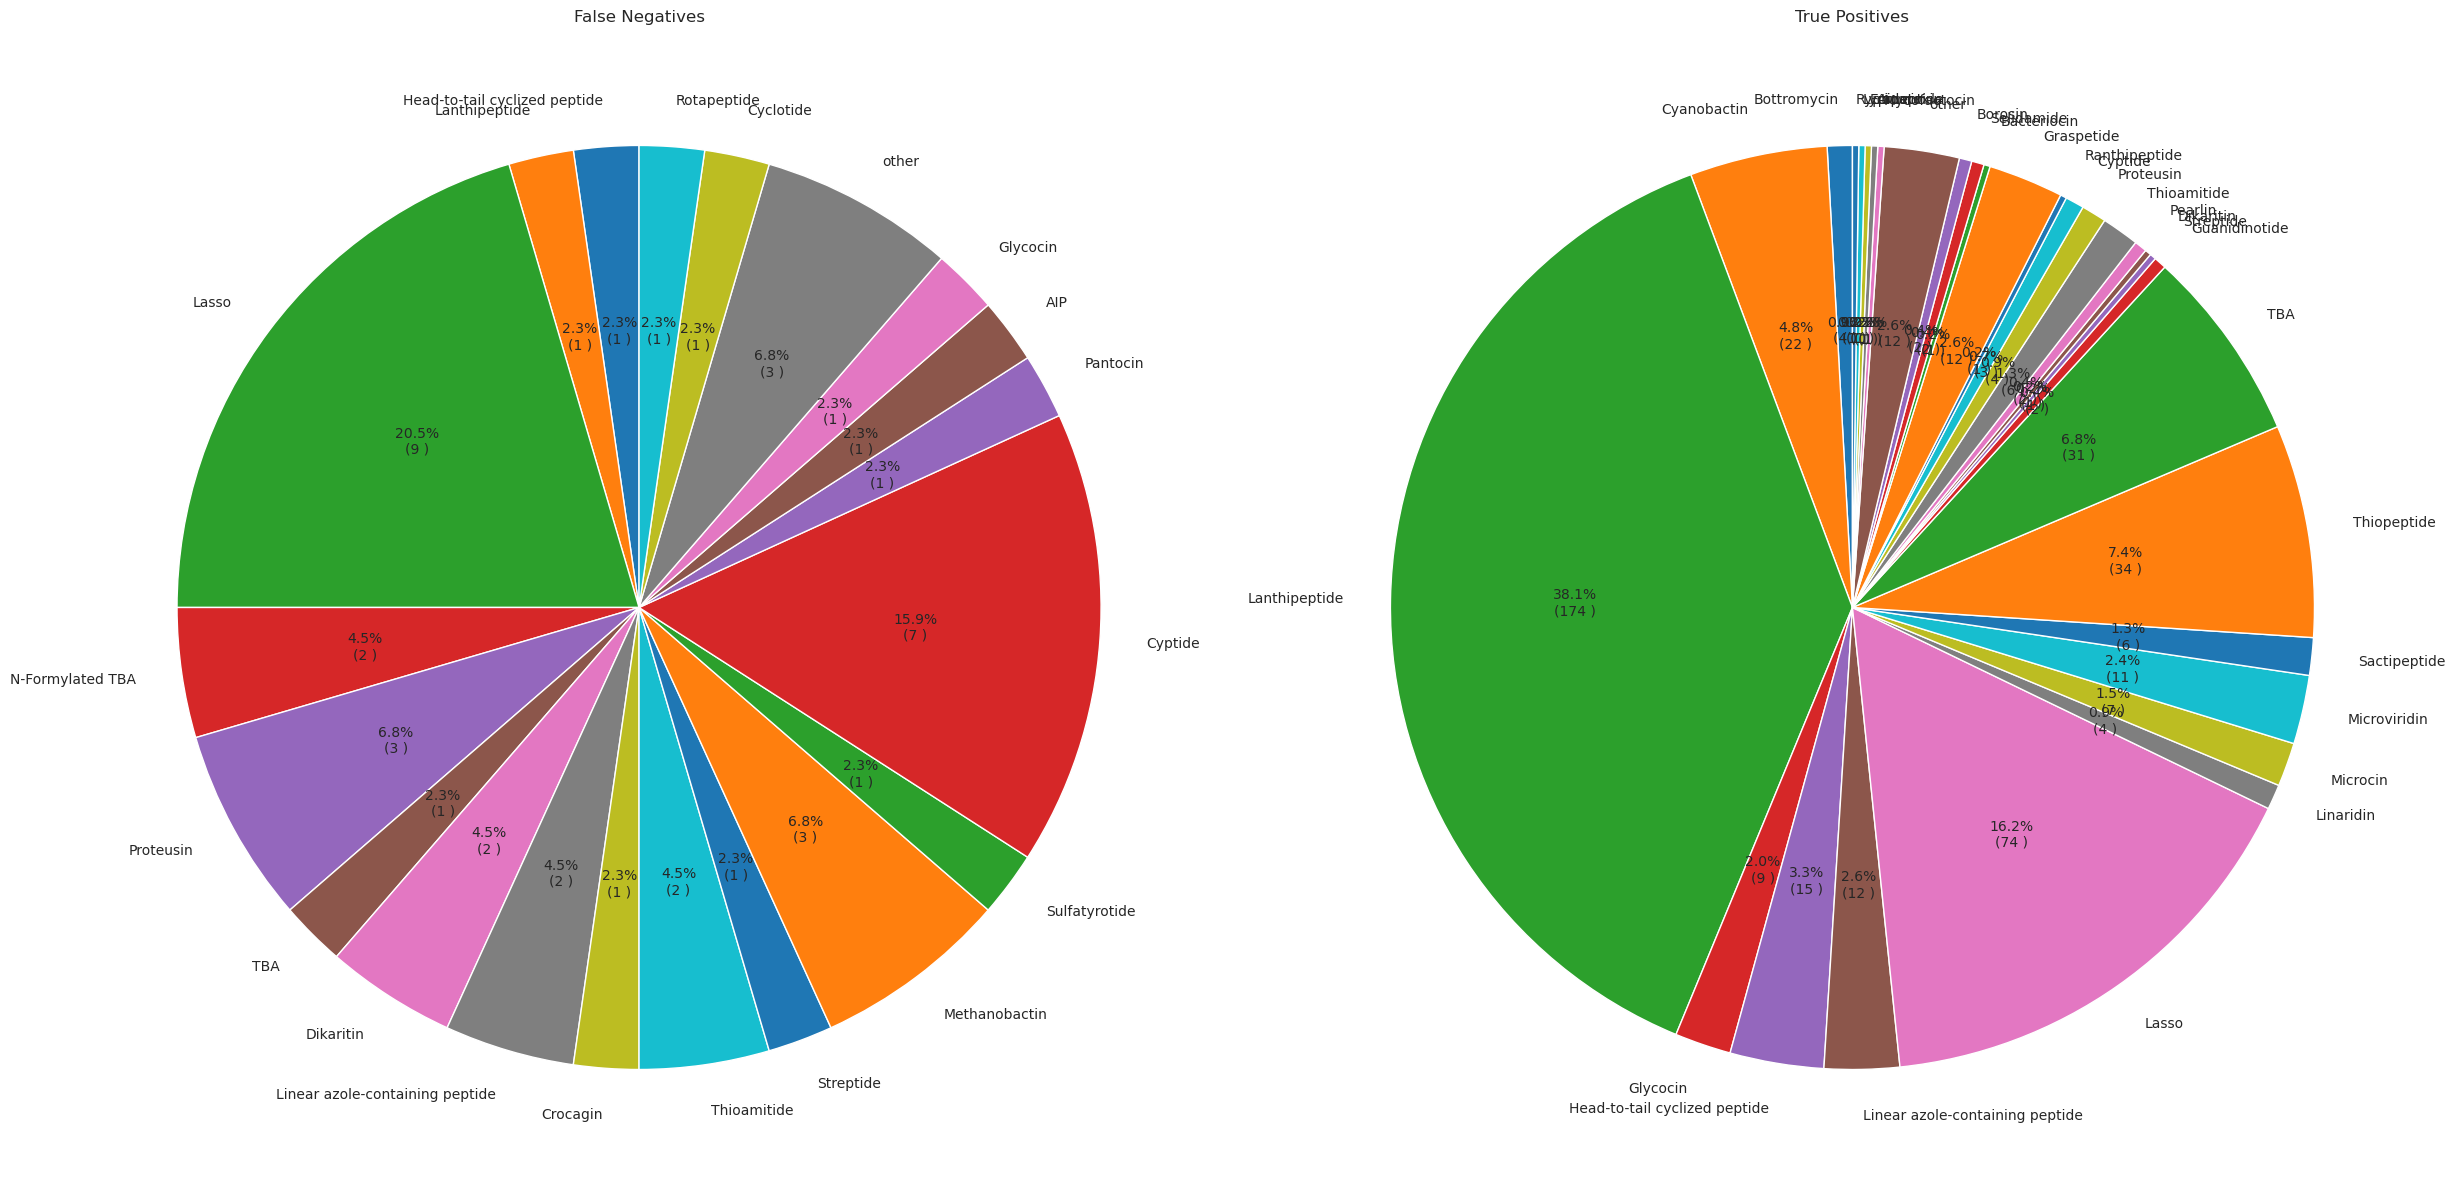

In [7]:
fn_data=[]
fn_labels=[]
for cat in fn_classes:
    if cat not in fn_labels:
        fn_labels.append(cat)
        fn_data.append(fn_classes.count(cat))

tp_data=[]
tp_labels=[]
for cat in tp_classes:
    if cat not in tp_labels:
        tp_labels.append(cat)
        tp_data.append(tp_classes.count(cat))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} )"

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(25, 12.5))  # 1 row, 2 columns

# First pie chart
axes[0].pie(fn_data, labels=fn_labels, autopct=lambda pct: func(pct, fn_data), startangle=90)
axes[0].set_title('False Negatives')

# Second pie chart
axes[1].pie(tp_data, labels=tp_labels, autopct=lambda pct: func(pct, tp_data), startangle=90)
axes[1].set_title('True Positives')

# Adjust layout and display
plt.tight_layout()
plt.show()